In [95]:
import numpy as np
import tensorflow as tf
import gzip
import pickle
import sys
import copy
import os.path
import pdb

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# MNIST

In [76]:
with open('results/weight_pruning_wp_hibp_mnist.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_nnvi', 'yb_nnvi', 'ya_ibp', 'yb_ibp'])

In [77]:
xs = d['xs']
ya = d['ya_nnvi']
yb = d['yb_nnvi']
ya_hibp = d['ya_ibp']
yb_hibp = d['yb_ibp']

In [78]:
with open('results/weight_pruning_wp_ibp_mnist.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_nnvi', 'yb_nnvi', 'ya_ibp', 'yb_ibp'])

In [79]:
xs = d['xs']
ya_ibp = d['ya_ibp']
yb_ibp = d['yb_ibp']

In [80]:
num_layers = 4 
for i in range(num_layers):
    print("MFVI acc: {:.2f} std: {:.2f}".format(np.mean(ya[:,i,0]), np.std(ya[:,i,0])))
    print("IBNN acc: {:.2f} std: {:.2f}".format(np.mean(ya_ibp[:,i,0]), np.std(ya_ibp[:,i,0])))
    print("HIBNN acc: {:.2f} std: {:.2f}".format(np.mean(ya_hibp[:,i,0]), np.std(ya_hibp[:,i,0])))

MFVI acc: 0.97 std: 0.00
IBNN acc: 0.95 std: 0.00
HIBNN acc: 0.95 std: 0.00
MFVI acc: 0.97 std: 0.00
IBNN acc: 0.95 std: 0.00
HIBNN acc: 0.95 std: 0.00
MFVI acc: 0.97 std: 0.00
IBNN acc: 0.94 std: 0.00
HIBNN acc: 0.94 std: 0.00
MFVI acc: 0.97 std: 0.00
IBNN acc: 0.94 std: 0.00
HIBNN acc: 0.94 std: 0.00


In [81]:
_ya_mean.shape

(4, 34)

/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:208: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


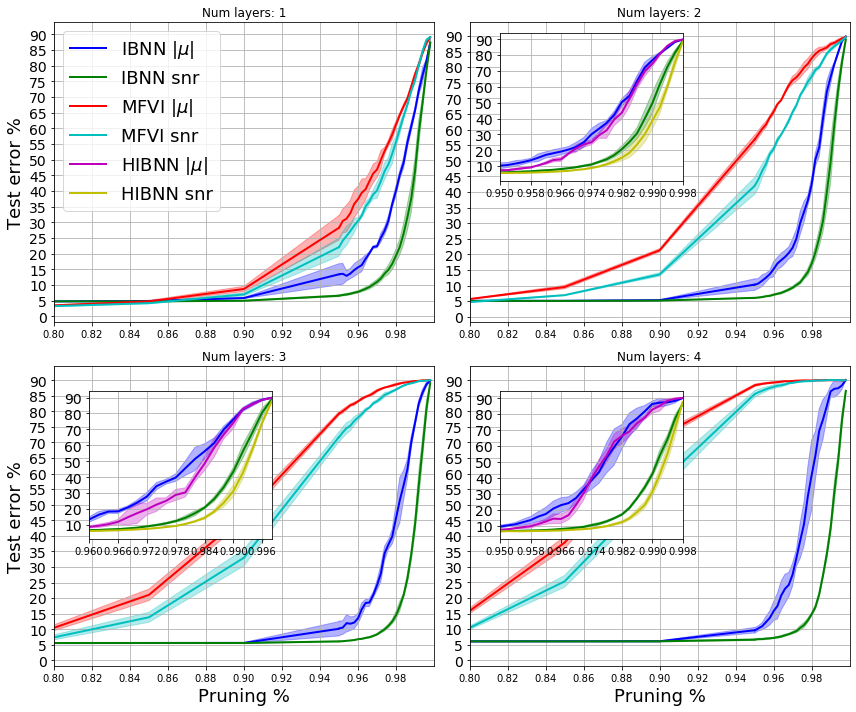

In [82]:
_ibp_ya_mean = np.mean(ya_ibp, axis=0)
_ibp_ya_std = np.std(ya_ibp, axis=0)
_ibp_yb_mean = np.mean(yb_ibp, axis=0)
_ibp_yb_std = np.std(yb_ibp, axis=0)
_hibp_ya_mean = np.mean(ya_hibp, axis=0)
_hibp_ya_std = np.std(ya_hibp, axis=0)
_hibp_yb_mean = np.mean(yb_hibp, axis=0)
_hibp_yb_std = np.std(yb_hibp, axis=0)
_ya_mean = np.mean(ya, axis=0)
_ya_std = np.std(ya, axis=0)
_yb_mean = np.mean(yb, axis=0)
_yb_std = np.std(yb, axis=0)

def test_error(ls):
    return 100*(1-np.array(ls))

def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])#,axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

fig_size = (12, 10)

lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 20
legend_size = 18

fig, ax = plt.subplots(2, 2, figsize=fig_size)
num_layers=4
for i in range(num_layers):
    j = i // 2
    k = i % 2
    l1 = ax[j, k].plot(xs, test_error(_ibp_ya_mean[i]), linewidth=lw, color='b', label="IBNN $|\mu|$")
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
                   test_error([x + y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
                   alpha=0.3, color='b')

    l2 = ax[j, k].plot(xs, test_error(_ibp_yb_mean[i]), linewidth=lw, color='g', label='IBNN snr')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
                   test_error([x + y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
                   alpha=0.3, color='g')

    l3 = ax[j, k].plot(xs, test_error(_ya_mean[i]), linewidth=lw, color='r', label='MFVI $|\mu|$')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ya_mean[i], _ya_std[i])]),
                   test_error([x + y for x, y in zip(_ya_mean[i], _ya_std[i])]),
                   alpha=0.3, color='r')

    l4 = ax[j, k].plot(xs, test_error(_yb_mean[i]), linewidth=lw, color='c', label='MFVI snr')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_yb_mean[i], _yb_std[i])]),
                   test_error([x + y for x, y in zip(_yb_mean[i], _yb_std[i])]),
                   alpha=0.3, color='c')
    ax[j, k].set_title("Num layers: {}".format(i+1))
    #ax[j, k].set_xscale('log')
    #plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[j, k].tick_params(axis='x', labelsize=10)
    ax[j, k].tick_params(axis='y', labelsize=14)
    ax[j, k].grid()
    yticks = np.arange(0, 95, 5)
    ax[j, k].set_yticks(yticks)
    xticks = np.arange(xs[0], xs[-1], 0.02)
    ax[j, k].set_xticks(xticks)
    ax[j, k].set_xlim(0.8, 1.0)
    if k == 0: # first col only
        ax[j, k].set_ylabel("Test error %", fontsize=label_size)
    if j == 1: # bottom row only
        ax[j, k].set_xlabel("Pruning %", fontsize=label_size)
    
# 2 layers subplot
i=1
subpos = [0.1,0.6,0.6,0.6] # x_pos, y_pos, 2nd x_pos, 2nd y_pos
subax1 = add_subplot_axes(ax[0, 1], subpos)
subax1.plot(xs, test_error(_ibp_ya_mean[i]), linewidth=lw, color='b', label='IBNN $|\mu|$')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               alpha=0.3, color='b')

subax1.plot(xs, test_error(_ibp_yb_mean[i]), linewidth=lw, color='g', label='IBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               alpha=0.3, color='g')

subax1.plot(xs, test_error(_hibp_ya_mean[i]), linewidth=lw, color='m', label='HIBNN $|\mu|$')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               alpha=0.3, color='m')

subax1.plot(xs, test_error(_hibp_yb_mean[i]), linewidth=lw, color='y', label='HIBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               alpha=0.3, color='y')

subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.95, xs[-1], 0.008)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.95, xs[-1])

# 3 layers subplot
i=2
subpos = [-0.05,0.35,0.6,0.6] # x_pos, y_pos, 2nd x_pos, 2nd y_pos
subax1 = add_subplot_axes(ax[1, 0], subpos)
subax1.plot(xs, test_error(_ibp_ya_mean[i]), linewidth=lw, color='b', label="IBNN $|\mu|$")
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               alpha=0.3, color='b')

subax1.plot(xs, test_error(_ibp_yb_mean[i]), linewidth=lw, color='g', label='IBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               alpha=0.3, color='g')

l5 = subax1.plot(xs, test_error(_hibp_ya_mean[i]), linewidth=lw, color='m', label='HIBNN $|\mu|$')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               alpha=0.3, color='m')

l6 = subax1.plot(xs, test_error(_hibp_yb_mean[i]), linewidth=lw, color='y', label='HIBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               alpha=0.3, color='y')

subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.96, xs[-1], 0.006)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.96, xs[-1])

# 4 layers subplot
i=3
subpos = [0.1,0.35,0.6,0.6] # x_pos, y_pos, 2nd x_pos, 2nd y_pos
subax1 = add_subplot_axes(ax[1, 1], subpos)
subax1.plot(xs, test_error(_ibp_ya_mean[i]), linewidth=lw, color='b', label="IBNN $|\mu|$")
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               alpha=0.3, color='b')

subax1.plot(xs, test_error(_ibp_yb_mean[i]), linewidth=lw, color='g', label='IBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               alpha=0.3, color='g')
l5 = subax1.plot(xs, test_error(_hibp_ya_mean[i]), linewidth=lw, color='m', label='HIBNN $|\mu|$')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               alpha=0.3, color='m')

l6 = subax1.plot(xs, test_error(_hibp_yb_mean[i]), linewidth=lw, color='y', label='HIBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               alpha=0.3, color='y')

#ax[j, k].set_xscale('log')
#plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.95, xs[-1], 0.008)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.95, xs[-1])

lns = l1+l2+l3+l4+l5+l6
labs = [l.get_label() for l in lns]
#ax.legend(lns, labs, loc=0)
ax[0, 0].legend(lns, labs, fontsize=legend_size, loc='upper left')
plt.tight_layout()
#plt.xlabel("Cut off", fontsize=legend_size)
#plt.ylabel("Test error", fontsize=legend_size)
#plt.xlim(0.4, 1.0)
plt.savefig("plots/wp_full_mnist_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:126: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


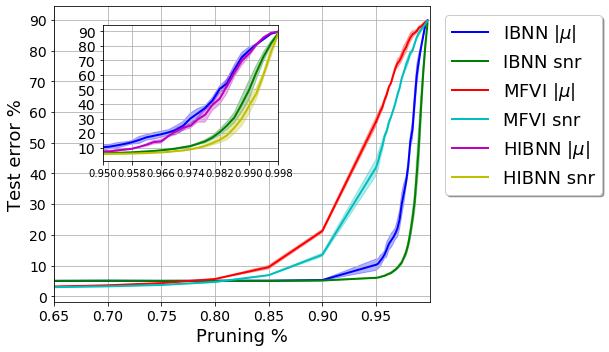

In [83]:
_ibp_ya_mean = np.mean(ya_ibp, axis=0)
_ibp_ya_std = np.std(ya_ibp, axis=0)
_ibp_yb_mean = np.mean(yb_ibp, axis=0)
_ibp_yb_std = np.std(yb_ibp, axis=0)
_hibp_ya_mean = np.mean(ya_hibp, axis=0)
_hibp_ya_std = np.std(ya_hibp, axis=0)
_hibp_yb_mean = np.mean(yb_hibp, axis=0)
_hibp_yb_std = np.std(yb_hibp, axis=0)
_ya_mean = np.mean(ya, axis=0)
_ya_std = np.std(ya, axis=0)
_yb_mean = np.mean(yb, axis=0)
_yb_std = np.std(yb, axis=0)

def test_error(ls):
    return 100*(1-np.array(ls))

def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])#,axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

fig_size = (9, 5)

lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 20
legend_size = 18

fig, ax = plt.subplots(figsize=fig_size)
l=1
l1 = ax.plot(xs, test_error(_ibp_ya_mean[l]), linewidth=lw, color='b', label="IBNN $|\mu|$")
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_ya_mean[l], _ibp_ya_std[l])]),
               test_error([x + y for x, y in zip(_ibp_ya_mean[l], _ibp_ya_std[l])]),
               alpha=0.3, color='b')

l2 = ax.plot(xs, test_error(_ibp_yb_mean[l]), linewidth=lw, color='g', label='IBNN snr')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_yb_mean[l], _ibp_yb_std[l])]),
               test_error([x + y for x, y in zip(_ibp_yb_mean[l], _ibp_yb_std[l])]),
               alpha=0.3, color='g')

l3 = ax.plot(xs, test_error(_ya_mean[l]), linewidth=lw, color='r', label='MFVI $|\mu|$')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_ya_mean[l], _ya_std[l])]),
               test_error([x + y for x, y in zip(_ya_mean[l], _ya_std[l])]),
               alpha=0.3, color='r')

l4 = ax.plot(xs, test_error(_yb_mean[l]), linewidth=lw, color='c', label='MFVI snr')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_yb_mean[l], _yb_std[l])]),
               test_error([x + y for x, y in zip(_yb_mean[l], _yb_std[l])]),
               alpha=0.3, color='c')
#ax.set_xscale('log')
#plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.grid()
yticks = np.arange(0, 91, 10)
ax.set_yticks(yticks)
xticks = np.arange(xs[0], xs[-1], 0.05)
ax.set_xticks(xticks)
ax.set_xlim(0.65, 1.0)
ax.set_ylabel("Test error %", fontsize=label_size)
ax.set_xlabel("Pruning %", fontsize=label_size)
    
# 2 layers subplot
subpos = [0.05,0.55,0.35,0.50] # x_pos, y_pos, 2nd x_pos, 2nd y_pos
subax1 = add_subplot_axes(ax, subpos)
subax1.plot(xs, test_error(_ibp_ya_mean[l]), linewidth=lw, color='b', label='IBNN $|\mu|$')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_ya_mean[l], _ibp_ya_std[l])]),
               test_error([x + y for x, y in zip(_ibp_ya_mean[l], _ibp_ya_std[l])]),
               alpha=0.3, color='b')

subax1.plot(xs, test_error(_ibp_yb_mean[l]), linewidth=lw, color='g', label='IBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_yb_mean[l], _ibp_yb_std[l])]),
               test_error([x + y for x, y in zip(_ibp_yb_mean[l], _ibp_yb_std[l])]),
               alpha=0.3, color='g')

l5 = subax1.plot(xs, test_error(_hibp_ya_mean[l]), linewidth=lw, color='m', label='HIBNN $|\mu|$')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean[l], _hibp_ya_std[l])]),
               test_error([x + y for x, y in zip(_hibp_ya_mean[l], _hibp_ya_std[l])]),
               alpha=0.3, color='m')

l6 = subax1.plot(xs, test_error(_hibp_yb_mean[l]), linewidth=lw, color='y', label='HIBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean[l], _hibp_yb_std[l])]),
               test_error([x + y for x, y in zip(_hibp_yb_mean[l], _hibp_yb_std[l])]),
               alpha=0.3, color='y')

subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.95, xs[-1], 0.008)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.95, xs[-1])
lns = l1+l2+l3+l4+l5+l6
labs = [l.get_label() for l in lns]
# Put a legend to the right of the current axis
ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(1.25, 1), ncol=1, fancybox=True, shadow=True, 
           fontsize=legend_size)
plt.tight_layout()
#plt.xlabel("Cut off", fontsize=legend_size)
#plt.ylabel("Test error", fontsize=legend_size)
#plt.xlim(0.4, 1.0)
plt.savefig("plots/wp_2l_mnist_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

In [96]:
with open('results/mnist_wp_bscl_fine_xs.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_ibp', 'yb_ibp'])

In [97]:
d['xs'].shape

(46,)

In [98]:
xs_bscl = d['xs']
_ibp_ya_bscl_mean = np.mean(d['ya_ibp'], axis=0)
_ibp_ya_bscl_std = np.std(d['ya_ibp'], axis=0)
_ibp_yb_bscl_mean = np.mean(d['yb_ibp'], axis=0)
_ibp_yb_bscl_std = np.std(d['yb_ibp'], axis=0)

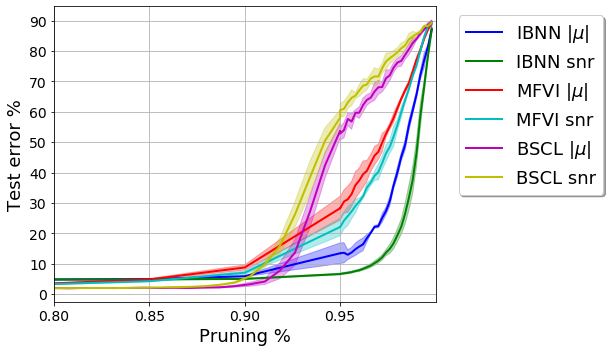

In [100]:
def test_error(ls):
    return 100*(1-np.array(ls))

def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])#,axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

fig_size = (9, 5)

lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 20
legend_size = 18

fig, ax = plt.subplots(figsize=fig_size)
l=0
l1 = ax.plot(xs, test_error(_ibp_ya_mean[l]), linewidth=lw, color='b', label="IBNN $|\mu|$")
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_ya_mean[l], _ibp_ya_std[l])]),
               test_error([x + y for x, y in zip(_ibp_ya_mean[l], _ibp_ya_std[l])]),
               alpha=0.3, color='b')

l2 = ax.plot(xs, test_error(_ibp_yb_mean[l]), linewidth=lw, color='g', label='IBNN snr')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_yb_mean[l], _ibp_yb_std[l])]),
               test_error([x + y for x, y in zip(_ibp_yb_mean[l], _ibp_yb_std[l])]),
               alpha=0.3, color='g')

l3 = ax.plot(xs, test_error(_ya_mean[l]), linewidth=lw, color='r', label='MFVI $|\mu|$')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_ya_mean[l], _ya_std[l])]),
               test_error([x + y for x, y in zip(_ya_mean[l], _ya_std[l])]),
               alpha=0.3, color='r')

l4 = ax.plot(xs, test_error(_yb_mean[l]), linewidth=lw, color='c', label='MFVI snr')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_yb_mean[l], _yb_std[l])]),
               test_error([x + y for x, y in zip(_yb_mean[l], _yb_std[l])]),
               alpha=0.3, color='c')

l5 = ax.plot(xs_bscl, test_error(_ibp_ya_bscl_mean), linewidth=lw, color='m', label='BSCL $|\mu|$')
ax.fill_between(xs_bscl,
               test_error([x - y for x, y in zip(_ibp_ya_bscl_mean, _ibp_ya_bscl_std)]),
               test_error([x + y for x, y in zip(_ibp_ya_bscl_mean, _ibp_ya_bscl_std)]),
               alpha=0.3, color='m')

l6 = ax.plot(xs_bscl, test_error(_ibp_yb_bscl_mean), linewidth=lw, color='y', label='BSCL snr')
ax.fill_between(xs_bscl,
               test_error([x - y for x, y in zip(_ibp_yb_bscl_mean, _ibp_ya_bscl_std)]),
               test_error([x + y for x, y in zip(_ibp_yb_bscl_mean, _ibp_ya_bscl_std)]),
               alpha=0.3, color='y')

#ax.set_xscale('log')
#plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.grid()
yticks = np.arange(0, 91, 10)
ax.set_yticks(yticks)
xticks = np.arange(xs[0], xs[-1], 0.05)
ax.set_xticks(xticks)
ax.set_xlim(0.80, 1.0)
ax.set_ylabel("Test error %", fontsize=label_size)
ax.set_xlabel("Pruning %", fontsize=label_size)

lns = l1+l2+l3+l4+l5+l6
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(1.25, 1), ncol=1, fancybox=True, shadow=True, 
           fontsize=legend_size)
plt.tight_layout()
plt.savefig("plots/wp_l1_hibp_bscl.pdf", bbox_inches='tight')
plt.show()

In [101]:
_ibp_ya_bscl_mean[0]

0.9800600647926331

In [102]:
_ibp_ya_bscl_std[0]

0.0005122376669898364

In [84]:
l=3
#yy = _yb_mean
#yy = _ibp_yb_mean
yy = _hibp_yb_mean
for i in range(len(xs)-1):
    thres = (yy[l, i] - yy[l, i+1]) / yy[l, i+1]
    print((yy[l, i] - yy[l, i+1]) / yy[l, i+1])
    if thres > 0.01:
        print("over 10% diff", i, xs[i])

0.0003173998127378315
-0.0005570170021317705
0.0004428844020241832
-0.00012339417823246024
0.00041262185410089716
0.00011086554168157605
-0.0007381980708055036
0.0011216500342709228
7.280552428357614e-05
0.0012789368803839405
-0.00042052536096926304
-0.00011275609673417426
0.0008700139434322268
0.0010309211927790219
0.0008331713221980663
0.0013747602653141225
0.001155284729783037
0.0027832790534464908
0.003400189002032181
0.0027004354600390274
0.004671718697800344
0.0075300020515801196
0.00818791322626133
0.013754656849038524
over 10% diff 23 0.978
0.014565629648588471
over 10% diff 24 0.98
0.02829855894285956
over 10% diff 25 0.982
0.048152589069628146
over 10% diff 26 0.984
0.05740159040017045
over 10% diff 27 0.986
0.11844572323007788
over 10% diff 28 0.988
0.19488258563510302
over 10% diff 29 0.99
0.2872861294365395
over 10% diff 30 0.992
0.5587275422834463
over 10% diff 31 0.994
1.3161264247911906
over 10% diff 32 0.996


In [85]:
sparsity_hibp = [0.972, 0.974, 0.978, 0.978]
sparsity_ibp = [0.9, 0.974, 0.974, 0.972]
ibp_accs = [np.mean(ya_ibp[:,i,0]) for i in range(4)] 
ibp_accs_std = [np.std(ya_ibp[:,i,0]) for i in range(4)]
hibp_accs = [np.mean(ya_hibp[:,i,0]) for i in range(4)]
hibp_accs_std = [np.std(ya_hibp[:,i,0]) for i in range(4)]
sparsity_mfvi = [0.85, 0.75, 0.7, 0.7]
mfvi_accs = [np.mean(ya[:,i,0]) for i in range(4)]
mfvi_accs_std = [np.std(ya[:,i,0]) for i in range(4)]

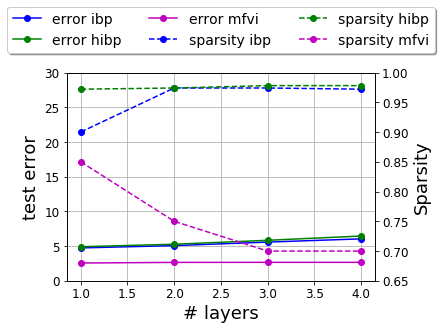

In [86]:
# Create some mock data
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 12
legend_size = 14

l = list(range(1, 5))

fig, ax1 = plt.subplots(figsize=(6, 5))
ax1.set_xlabel('# layers', fontsize=label_size)
ax1.set_ylabel('test error', fontsize=label_size)
l1 = ax1.plot(l, test_error(ibp_accs), color='b', marker='o', label='error ibp')
l2 = ax1.plot(l, test_error(hibp_accs), color='g', marker='o', label='error hibp')
l3 = ax1.plot(l, test_error(mfvi_accs), color='m', marker='o', label='error mfvi')
ax1.set_ylim(0, 30)
ax1.tick_params(axis='x', labelsize=tick_size)
ax1.tick_params(axis='y', labelsize=tick_size)
# ax1.set_xticks(range(1, 5))
# ax1.set_xticklabels(range(1, 5))
ax1.grid(True)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Sparsity', fontsize=label_size)
l4 = ax2.plot(l, sparsity_ibp, color='b', marker='o', linestyle='--', label='sparsity ibp')
l5 = ax2.plot(l, sparsity_hibp, color='g', marker='o', linestyle='--', label='sparsity hibp')
l6 = ax2.plot(l, sparsity_mfvi, color='m', marker='o', linestyle='--', label='sparsity mfvi')
ax2.tick_params(axis='y', labelsize=tick_size)
ax2.set_ylim(0.65, 1.0)
#ax2.tick_params(axis='y', labelcolor=color)

lns = l1+l2+l3+l4+l5+l6
labs = [l.get_label() for l in lns]
# Put a legend to the right of the current axis
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=3, fancybox=True, shadow=True, 
           fontsize=legend_size)
#plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("plots/wp_sparsity_acc_mnist_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

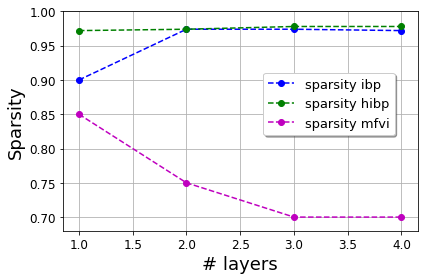

In [590]:
# Create some mock data
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 12
legend_size = 13

l = list(range(1, 5))

fig, ax = plt.subplots(figsize=(6, 4))
ax.set_xlabel('# layers', fontsize=label_size)
ax.set_ylabel('Sparsity', fontsize=label_size)
l1 = ax.plot(l, sparsity_ibp, color='b', marker='o', linestyle='--', label='sparsity ibp')
l2 = ax.plot(l, sparsity_hibp, color='g', marker='o', linestyle='--', label='sparsity hibp')
l3 = ax.plot(l, sparsity_mfvi, color='m', marker='o', linestyle='--', label='sparsity mfvi')
ax.set_ylim(0.68, 1.0)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)
ax.grid(True)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
# Put a legend to the right of the current axis
ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.75, 0.75), ncol=1, fancybox=True, shadow=True, 
           fontsize=legend_size)
#plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("plots/wp_mnist_sparsity_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

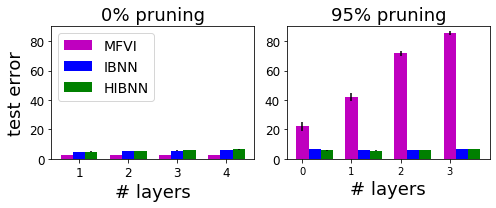

In [591]:
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 12
legend_size = 14

l = np.arange(4)
idx = np.where(xs == 0.95)[0][0]
width = 0.25
fig, ax = plt.subplots(1, 2, figsize=(7, 3))
ax[0].set_xlabel('# layers', fontsize=label_size)
ax[0].set_ylabel('test error', fontsize=label_size)
ax[0].set_title("0% pruning", fontsize=label_size)
l3 = ax[0].bar(l, test_error(_yb_mean[:, 0]), width, color='m', label='error mfvi', yerr=_yb_std[:, 0]*100)
l1 = ax[0].bar(l + width, test_error(_ibp_yb_mean[:, 0]), width, color='b', label='error ibp', yerr=_ibp_yb_std[:, 0]*100)
l2 = ax[0].bar(l + 2*width, test_error(_hibp_yb_mean[:, 0]), width, color='g', label='error hibp', yerr=_hibp_yb_std[:,0]*100)
ax[0].set_ylim(0, 90)
ax[0].tick_params(axis='x', labelsize=tick_size)
ax[0].tick_params(axis='y', labelsize=tick_size)
ax[0].set_xticks(l + width)
ax[0].set_xticklabels(('1', '2', '3', '4'))
# ax1.set_xticks(range(1, 5))
# ax1.set_xticklabels(range(1, 5))
#ax1.tick_params(axis='y', labelcolor=color)

ax[1].set_xlabel('# layers', fontsize=label_size)
ax[1].set_title('95% pruning', fontsize=label_size)
l6 = ax[1].bar(l, test_error(_yb_mean[:, idx]), width, color='m', label='error mfvi', yerr=_yb_std[:, idx]*100)
l4 = ax[1].bar(l + width, test_error(_ibp_yb_mean[:, idx]), width, color='b', label='error ibp', yerr=_ibp_yb_std[:, idx]*100)
l5 = ax[1].bar(l + 2*width, test_error(_hibp_yb_mean[:, idx]), width, color='g', label='error hibp', yerr=_hibp_yb_std[:, idx]*100)
ax[1].tick_params(axis='y', labelsize=tick_size)
ax[1].set_ylim(0, 90)

ax[0].legend(['MFVI', 'IBNN', 'HIBNN'], fontsize=legend_size, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("plots/wp_mnist_bar_pruning_acc_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

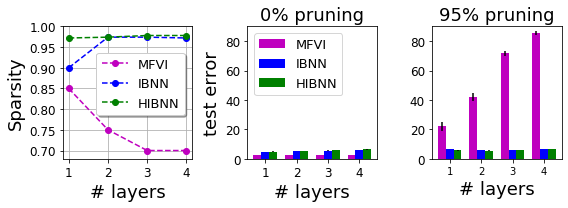

In [592]:
# Create some mock data
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 12
legend_size = 13

l = np.arange(4)

fig, ax = plt.subplots(1, 3, figsize=(8, 3))
ax[0].set_xlabel('# layers', fontsize=label_size)
ax[0].set_ylabel('Sparsity', fontsize=label_size)
l1 = ax[0].plot(l, sparsity_mfvi, color='m', marker='o', linestyle='--', label='MFVI')
l2 = ax[0].plot(l, sparsity_ibp, color='b', marker='o', linestyle='--', label='IBNN')
l3 = ax[0].plot(l, sparsity_hibp, color='g', marker='o', linestyle='--', label='HIBNN')
yticks = np.arange(0.7, 1.0, 0.05)
ax[0].set_yticks(yticks)
ax[0].set_ylim(0.68, 1.0)
ax[0].tick_params(axis='x', labelsize=tick_size)
ax[0].tick_params(axis='y', labelsize=tick_size)
ax[0].set_xticks(l)
ax[0].set_xticklabels(('1', '2', '3', '4'))
ax[0].grid(True)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
# Put a legend to the right of the current axis
ax[0].legend(lns, labs, loc='upper center', bbox_to_anchor=(0.6, 0.85), ncol=1, fancybox=True, shadow=True, 
           fontsize=legend_size)

idx = np.where(xs == 0.95)[0][0]
width = 0.25
ax[1].set_xlabel('# layers', fontsize=label_size)
ax[1].set_ylabel('test error', fontsize=label_size)
ax[1].set_title("0% pruning", fontsize=label_size)
ax[1].bar(l, test_error(_yb_mean[:, 0]), width, color='m', label='error mfvi', yerr=_yb_std[:, 0]*100)
ax[1].bar(l + width, test_error(_ibp_yb_mean[:, 0]), width, color='b', label='error ibp', yerr=_ibp_yb_std[:, 0]*100)
ax[1].bar(l + 2*width, test_error(_hibp_yb_mean[:, 0]), width, color='g', label='error hibp', yerr=_hibp_yb_std[:,0]*100)
ax[1].set_ylim(0, 90)

ax[1].tick_params(axis='x', labelsize=tick_size)
ax[1].tick_params(axis='y', labelsize=tick_size)
ax[1].set_xticks(l + width)
ax[1].set_xticklabels(('1', '2', '3', '4'))
# ax1.set_xticks(range(1, 5))
# ax1.set_xticklabels(range(1, 5))
#ax1.tick_params(axis='y', labelcolor=color)

ax[2].set_xlabel('# layers', fontsize=label_size)
ax[2].set_title('95% pruning', fontsize=label_size)
ax[2].bar(l, test_error(_yb_mean[:, idx]), width, color='m', label='error mfvi', yerr=_yb_std[:, idx]*100)
ax[2].bar(l + width, test_error(_ibp_yb_mean[:, idx]), width, color='b', label='error ibp', yerr=_ibp_yb_std[:, idx]*100)
ax[2].bar(l + 2*width, test_error(_hibp_yb_mean[:, idx]), width, color='g', label='error hibp', yerr=_hibp_yb_std[:, idx]*100)
ax[2].tick_params(axis='y', labelsize=tick_size)
ax[2].set_ylim(0, 90)
ax[2].set_xticks(l + width)
ax[2].set_xticklabels(('1', '2', '3', '4'))

ax[1].legend(['MFVI', 'IBNN', 'HIBNN'], fontsize=legend_size, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("plots/wp_mnist_pruning_sparsity_acc_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

# FMNIST

In [12]:
with open('results/weight_pruning_wp_hibp_fmnist.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_nnvi', 'yb_nnvi', 'ya_ibp', 'yb_ibp'])

In [14]:
np.mean(d['ya_nnvi'][:,0,0])

0.9782558672035796

In [7]:
with open('results/weight_pruning_wp_ibp_fmnist.pkl', 'rb') as input_file:
    d_bl = pickle.load(input_file)
d_bl.keys()

dict_keys(['xs', 'ya_nnvi', 'yb_nnvi', 'ya_ibp', 'yb_ibp'])

In [15]:
d_bl['ya_nnvi'][:,0,0]

array([0.        , 0.        , 0.97725771])

In [ ]:
with open('results/weight_pruning_wp_hibp_fmnist.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

In [3]:
with open('results/split_mnist_rs_hibp_l2_fmnist_nn_lr.pkl', 'rb') as input_file:
    d_new = pickle.load(input_file)
d_new.keys()

dict_keys(['vcl_ibp', 'uncerts_ibp', 'Z', 'ts', 'opt_thetas'])

In [4]:
d_new['opt_thetas']

{'lambda_1': 2.0,
 'lambda_2': 1.5,
 'a_start': 5.0,
 'alpha0': 6.240572087845997,
 'ibp_samples': 10.0,
 'no_pred_samples': 10.0,
 'prior_mean': 0.0,
 'batch_size': 512.0,
 'beta0': 1.0,
 'learning_rate': 0.0003,
 'learning_rate_decay': 1.0,
 'prior_var': 0.7,
 'no_epochs': 1000.0,
 'a_step': 1.0}

In [5]:
np.nanmean(d_new['vcl_ibp'][0,:,:,:])

0.8345508950948716

In [6]:
xs = d['xs']
ya = d['ya_nnvi']
yb = d['yb_nnvi']
ya_hibp = d['ya_ibp']
yb_hibp = d['yb_ibp']

In [554]:
ya.shape

(3, 4, 33)

In [555]:
num_layers = 4 
for i in range(num_layers):
    print("MFVI acc: {:.2f} std: {:.2f}".format(np.mean(ya[:,i,0]), np.std(ya[:,i,0])))
    print("HIBNN acc: {:.2f} std: {:.2f}".format(np.mean(ya_hibp[:,i,0]), np.std(ya_hibp[:,i,0])))

MFVI acc: 0.98 std: 0.00
HIBNN acc: 0.76 std: 0.01
MFVI acc: 0.98 std: 0.00
HIBNN acc: 0.79 std: 0.02
MFVI acc: 0.98 std: 0.00
HIBNN acc: 0.81 std: 0.00
MFVI acc: 0.98 std: 0.00
HIBNN acc: 0.80 std: 0.01


In [556]:
xs

array([0.6  , 0.65 , 0.7  , 0.75 , 0.8  , 0.85 , 0.9  , 0.95 , 0.95 ,
       0.952, 0.954, 0.956, 0.958, 0.96 , 0.962, 0.964, 0.966, 0.968,
       0.97 , 0.972, 0.974, 0.976, 0.978, 0.98 , 0.982, 0.984, 0.986,
       0.988, 0.99 , 0.992, 0.994, 0.996, 0.998])

/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


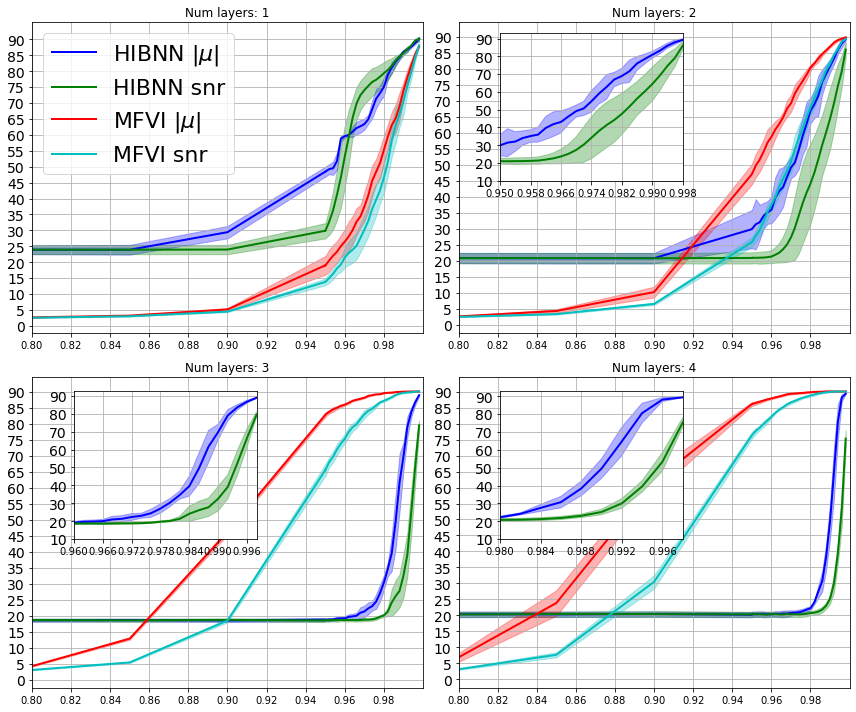

In [557]:
_hibp_ya_mean = np.mean(ya_hibp, axis=0)
_hibp_ya_std = np.std(ya_hibp, axis=0)
_hibp_yb_mean = np.mean(yb_hibp, axis=0)
_hibp_yb_std = np.std(yb_hibp, axis=0)
_ya_mean = np.mean(ya, axis=0)
_ya_std = np.std(ya, axis=0)
_yb_mean = np.mean(yb, axis=0)
_yb_std = np.std(yb, axis=0)

def test_error(ls):
    return 100*(1-np.array(ls))

def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])#,axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

fig_size = (12, 10)

lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 20
legend_size = 22

fig, ax = plt.subplots(2, 2, figsize=fig_size)
num_layers=4
for i in range(num_layers):
    j = i // 2
    k = i % 2
    ax[j, k].plot(xs, test_error(_hibp_ya_mean[i]), linewidth=lw, color='b')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
                   test_error([x + y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
                   alpha=0.3, color='b')

    ax[j, k].plot(xs, test_error(_hibp_yb_mean[i]), linewidth=lw, color='g')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
                   test_error([x + y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
                   alpha=0.3, color='g')

    ax[j, k].plot(xs, test_error(_ya_mean[i]), linewidth=lw, color='r')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ya_mean[i], _ya_std[i])]),
                   test_error([x + y for x, y in zip(_ya_mean[i], _ya_std[i])]),
                   alpha=0.3, color='r')

    ax[j, k].plot(xs, test_error(_yb_mean[i]), linewidth=lw, color='c')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_yb_mean[i], _yb_std[i])]),
                   test_error([x + y for x, y in zip(_yb_mean[i], _yb_std[i])]),
                   alpha=0.3, color='c')
    ax[j, k].set_title("Num layers: {}".format(i+1))
    #ax[j, k].set_xscale('log')
    #plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[j, k].tick_params(axis='x', labelsize=10)
    ax[j, k].tick_params(axis='y', labelsize=14)
    ax[j, k].grid()
    yticks = np.arange(0, 95, 5)
    ax[j, k].set_yticks(yticks)
    xticks = np.arange(xs[0], xs[-1], 0.02)
    ax[j, k].set_xticks(xticks)
    ax[j, k].set_xlim(0.8, 1.0)
    
# 2 layers subplot
i=1
subpos = [0.1,0.6,0.6,0.6] # x_pos, y_pos, 2nd x_pos, 2nd y_pos
subax1 = add_subplot_axes(ax[0, 1], subpos)
subax1.plot(xs, test_error(_hibp_ya_mean[i]), linewidth=lw, color='b')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               alpha=0.3, color='b')

subax1.plot(xs, test_error(_hibp_yb_mean[i]), linewidth=lw, color='g')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               alpha=0.3, color='g')

subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.95, xs[-1], 0.008)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.95, xs[-1])

# 3 layers subplot
i=2
subpos = [-0.1,0.35,0.6,0.6] # x_pos, y_pos, 2nd x_pos, 2nd y_pos
subax1 = add_subplot_axes(ax[1, 0], subpos)
subax1.plot(xs, test_error(_hibp_ya_mean[i]), linewidth=lw, color='b')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               alpha=0.3, color='b')

subax1.plot(xs, test_error(_hibp_yb_mean[i]), linewidth=lw, color='g')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               alpha=0.3, color='g')

subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.96, xs[-1], 0.006)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.96, xs[-1])

# 4 layers subplot
i=3
subpos = [0.1,0.35,0.6,0.6] # x_pos, y_pos, 2nd x_pos, 2nd y_pos
subax1 = add_subplot_axes(ax[1, 1], subpos)
subax1.plot(xs, test_error(_hibp_ya_mean[i]), linewidth=lw, color='b')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               alpha=0.3, color='b')

subax1.plot(xs, test_error(_hibp_yb_mean[i]), linewidth=lw, color='g')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               alpha=0.3, color='g')

#ax[j, k].set_xscale('log')
#plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.98, xs[-1], 0.004)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.98, xs[-1])


ax[0, 0].legend(["HIBNN $|\mu|$", 'HIBNN snr', 'MFVI $|\mu|$', 'MFVI snr'], fontsize=legend_size, loc='upper left')
plt.tight_layout()
#plt.xlabel("Cut off", fontsize=legend_size)
#plt.ylabel("Test error", fontsize=legend_size)
#plt.xlim(0.4, 1.0)
#plt.savefig("plots/weight_pruning_new_hibp_x5.pdf", bbox_inches='tight')
plt.show()

# IBP

In [57]:
with open('results/weight_pruning_wp_ibp_fmnist.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_nnvi', 'yb_nnvi', 'ya_ibp', 'yb_ibp', 'ya_ibp_before_ft', 'yb_ibp_before_ft'])

In [58]:
xs = d['xs']
ya_ibp = d['ya_ibp']
yb_ibp = d['yb_ibp']

In [59]:
num_layers = 4 
for i in range(num_layers):
    print("IBNN acc: {:.2f} std: {:.2f}".format(np.mean(ya_ibp[:,i,0]), np.std(ya_ibp[:,i,0])))

IBNN acc: 0.00 std: 0.00
IBNN acc: 0.81 std: 0.00
IBNN acc: 0.80 std: 0.01
IBNN acc: 0.79 std: 0.02


In [560]:
num_layers = 4 
for i in range(num_layers):
    print("IBNN acc: {:.2f} std: {:.2f}".format(np.mean(ya_ibp[:,i,0]), np.std(ya_ibp[:,i,0])))

IBNN acc: 0.78 std: 0.01
IBNN acc: 0.82 std: 0.00
IBNN acc: 0.81 std: 0.01
IBNN acc: 0.80 std: 0.01


/nfs/home/samuelk/anaconda2/envs/tf-gpu-cuda8/lib/python3.7/site-packages/ipykernel_launcher.py:204: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


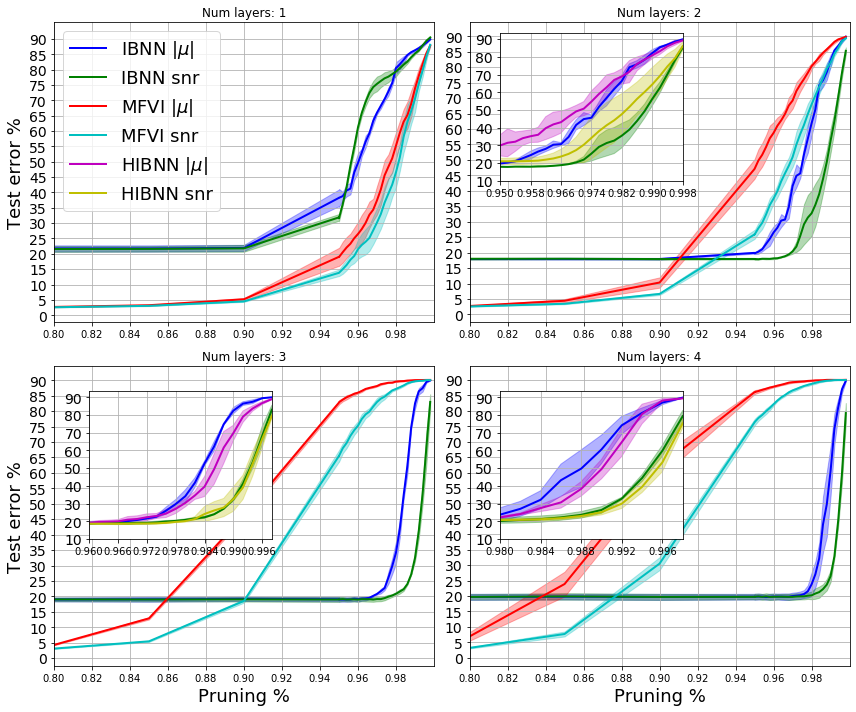

In [561]:
_ibp_ya_mean = np.mean(ya_ibp, axis=0)
_ibp_ya_std = np.std(ya_ibp, axis=0)
_ibp_yb_mean = np.mean(yb_ibp, axis=0)
_ibp_yb_std = np.std(yb_ibp, axis=0)
_ya_mean = np.mean(ya, axis=0)
_ya_std = np.std(ya, axis=0)
_yb_mean = np.mean(yb, axis=0)
_yb_std = np.std(yb, axis=0)

def test_error(ls):
    return 100*(1-np.array(ls))

def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])#,axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

fig_size = (12, 10)

lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 20
legend_size = 18

fig, ax = plt.subplots(2, 2, figsize=fig_size)
num_layers=4
for i in range(num_layers):
    j = i // 2
    k = i % 2
    l1 = ax[j, k].plot(xs, test_error(_ibp_ya_mean[i]), linewidth=lw, color='b', label="IBNN $|\mu|$")
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
                   test_error([x + y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
                   alpha=0.3, color='b')

    l2 = ax[j, k].plot(xs, test_error(_ibp_yb_mean[i]), linewidth=lw, color='g', label='IBNN snr')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
                   test_error([x + y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
                   alpha=0.3, color='g')

    l3 = ax[j, k].plot(xs, test_error(_ya_mean[i]), linewidth=lw, color='r', label='MFVI $|\mu|$')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ya_mean[i], _ya_std[i])]),
                   test_error([x + y for x, y in zip(_ya_mean[i], _ya_std[i])]),
                   alpha=0.3, color='r')

    l4 = ax[j, k].plot(xs, test_error(_yb_mean[i]), linewidth=lw, color='c', label='MFVI snr')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_yb_mean[i], _yb_std[i])]),
                   test_error([x + y for x, y in zip(_yb_mean[i], _yb_std[i])]),
                   alpha=0.3, color='c')
    ax[j, k].set_title("Num layers: {}".format(i+1))
    #ax[j, k].set_xscale('log')
    #plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
    ax[j, k].tick_params(axis='x', labelsize=10)
    ax[j, k].tick_params(axis='y', labelsize=14)
    ax[j, k].grid()
    yticks = np.arange(0, 95, 5)
    ax[j, k].set_yticks(yticks)
    xticks = np.arange(xs[0], xs[-1], 0.02)
    ax[j, k].set_xticks(xticks)
    ax[j, k].set_xlim(0.8, 1.0)
    if k == 0: # first col only
        ax[j, k].set_ylabel("Test error %", fontsize=label_size)
    if j == 1: # bottom row only
        ax[j, k].set_xlabel("Pruning %", fontsize=label_size)
    
# 2 layers subplot
i=1
subpos = [0.1,0.6,0.6,0.6] # x_pos, y_pos, 2nd x_pos, 2nd y_pos
subax1 = add_subplot_axes(ax[0, 1], subpos)
subax1.plot(xs, test_error(_ibp_ya_mean[i]), linewidth=lw, color='b', label='IBNN $|\mu|$')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               alpha=0.3, color='b')

subax1.plot(xs, test_error(_ibp_yb_mean[i]), linewidth=lw, color='g', label='IBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               alpha=0.3, color='g')

subax1.plot(xs, test_error(_hibp_ya_mean[i]), linewidth=lw, color='m', label='HIBNN $|\mu|$')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               alpha=0.3, color='m')

subax1.plot(xs, test_error(_hibp_yb_mean[i]), linewidth=lw, color='y', label='HIBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               alpha=0.3, color='y')

subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.95, xs[-1], 0.008)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.95, xs[-1])

# 3 layers subplot
i=2
subpos = [-0.05,0.35,0.6,0.6] # x_pos, y_pos, 2nd x_pos, 2nd y_pos
subax1 = add_subplot_axes(ax[1, 0], subpos)
subax1.plot(xs, test_error(_ibp_ya_mean[i]), linewidth=lw, color='b', label="IBNN $|\mu|$")
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               alpha=0.3, color='b')

subax1.plot(xs, test_error(_ibp_yb_mean[i]), linewidth=lw, color='g', label='IBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               alpha=0.3, color='g')

l5 = subax1.plot(xs, test_error(_hibp_ya_mean[i]), linewidth=lw, color='m', label='HIBNN $|\mu|$')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               alpha=0.3, color='m')

l6 = subax1.plot(xs, test_error(_hibp_yb_mean[i]), linewidth=lw, color='y', label='HIBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               alpha=0.3, color='y')

subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.96, xs[-1], 0.006)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.96, xs[-1])

# 4 layers subplot
i=3
subpos = [0.1,0.35,0.6,0.6] # x_pos, y_pos, 2nd x_pos, 2nd y_pos
subax1 = add_subplot_axes(ax[1, 1], subpos)
subax1.plot(xs, test_error(_ibp_ya_mean[i]), linewidth=lw, color='b', label="IBNN $|\mu|$")
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
               alpha=0.3, color='b')

subax1.plot(xs, test_error(_ibp_yb_mean[i]), linewidth=lw, color='g', label='IBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
               alpha=0.3, color='g')
l5 = subax1.plot(xs, test_error(_hibp_ya_mean[i]), linewidth=lw, color='m', label='HIBNN $|\mu|$')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_hibp_ya_mean[i], _hibp_ya_std[i])]),
               alpha=0.3, color='m')

l6 = subax1.plot(xs, test_error(_hibp_yb_mean[i]), linewidth=lw, color='y', label='HIBNN snr')
subax1.fill_between(xs,
               test_error([x - y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_hibp_yb_mean[i], _hibp_yb_std[i])]),
               alpha=0.3, color='y')

#ax[j, k].set_xscale('log')
#plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.98, xs[-1], 0.004)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.98, xs[-1])

lns = l1+l2+l3+l4+l5+l6
labs = [l.get_label() for l in lns]
#ax.legend(lns, labs, loc=0)
ax[0, 0].legend(lns, labs, fontsize=legend_size, loc='upper left')
plt.tight_layout()
#plt.xlabel("Cut off", fontsize=legend_size)
#plt.ylabel("Test error", fontsize=legend_size)
#plt.xlim(0.4, 1.0)
plt.savefig("plots/wp_full_fmnist_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

In [562]:
ya_ibp_l3_finetune_beta_params_fixed = [0.840347110470639, 0.8416979825949363, 0.8414497639559492, 0.8409909025023254, 0.8405350069456464, 
 0.8408069633230377, 0.8406645572638206, 0.8370253187191636, 0.8374268193788166,0.8364013010942482, 
 0.8337183572069, 0.8337351657167267, 0.8264418523522872, 0.7877027294303796, 0.7530913783025139, 
 0.716785006885287, 0.7172804603093785, 0.715730814239647, 0.5928728248499616, 0.5058059730107273, 
 0.5030498406555077, 0.4424109975748424, 0.403362342073947, 0.28440664614303207, 0.2715100879910627,
 0.19540941451169275,0.13593057722230498, 0.1087925235116029, 0.09986946175370039, 0.09770965189496172, 0.10082476284307769, 0.10138350498827198, 0.10035996799227555]

yb_ibp_l3_finetune_beta_params_fixed = [0.8408138842522342, 0.8399376974830143, 0.84127571386627, 0.8401354800296734, 0.8410136465784868,
 0.8405686307557023, 0.840869261494166, 0.8399831901622719, 0.8389369068266471, 0.841360756868049,
 0.8414665762382217, 0.840840588642072, 0.840484573116785, 0.8403688722018952, 0.8399930777429022,
 0.8396983765348605, 0.839278086831298, 0.8385838587072832, 0.8375237342677541, 0.8364230605620375,
 0.8297943050348308, 0.8161115503009362, 0.7793552173843867, 0.6771944240678718, 0.5236402297321753,
 0.4776691077630732, 0.4701859173895438, 0.46217662397819215, 0.4430122628242153, 0.3724970334692846,
 0.29198081602778614, 0.2197369474776183, 0.10924841765361494]

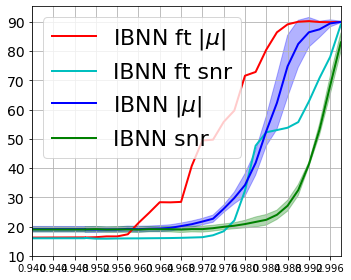

In [563]:
def test_error(ls):
    return 100*(1-np.array(ls))

fig_size = (5, 4)

lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 22
tick_size = 20
legend_size = 22

fig, ax = plt.subplots(1, 1, figsize=fig_size)
ax.plot(xs, test_error(ya_ibp_l3_finetune_beta_params_fixed), linewidth=lw, color='r')

ax.plot(xs, test_error(yb_ibp_l3_finetune_beta_params_fixed), linewidth=lw, color='c')

ax.plot(xs, test_error(_ibp_ya_mean[2]), linewidth=lw, color='b')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_ya_mean[2], _ibp_ya_std[i])]),
               test_error([x + y for x, y in zip(_ibp_ya_mean[2], _ibp_ya_std[i])]),
               alpha=0.3, color='b')

ax.plot(xs, test_error(_ibp_yb_mean[2]), linewidth=lw, color='g')
ax.fill_between(xs,
               test_error([x - y for x, y in zip(_ibp_yb_mean[2], _ibp_yb_std[i])]),
               test_error([x + y for x, y in zip(_ibp_yb_mean[2], _ibp_yb_std[i])]),
               alpha=0.3, color='g')
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=14)
ax.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.94, xs[-1], 0.004)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
ax.set_xlim(0.94, xs[-1])
ax.legend(['IBNN ft $|\mu|$', 'IBNN ft snr', "IBNN $|\mu|$", 'IBNN snr'], fontsize=legend_size, loc='upper left')
plt.tight_layout()
#plt.xlabel("Cut off", fontsize=legend_size)
#plt.ylabel("Test error", fontsize=legend_size)
#plt.xlim(0.4, 1.0)
#plt.savefig("plots/weight_pruning_new_hibp_x5.pdf", bbox_inches='tight')
plt.show()

# FMNIST finetuning

In [67]:
with open('results/weight_pruning_wp_ibp_fmnist.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_nnvi', 'yb_nnvi', 'ya_ibp', 'yb_ibp', 'ya_ibp_before_ft', 'yb_ibp_before_ft'])

In [68]:
with open('results/weight_pruning_wp_fmnist_ibp_ft_orig_params.pkl', 'rb') as input_file:
    d_ft = pickle.load(input_file)
d_ft.keys()

dict_keys(['xs', 'ya_nnvi', 'yb_nnvi', 'ya_ibp', 'yb_ibp', 'ya_ibp_before_ft', 'yb_ibp_before_ft'])

In [69]:
d['ya_ibp'].shape

(3, 4, 34)

In [70]:
xs = d['xs']
ya = d['ya_nnvi']
yb = d['yb_nnvi']
ya_ibp_orig = d['ya_ibp']
yb_ibp_orig = d['yb_ibp']
ya_ibp = d_ft['ya_ibp_before_ft']
yb_ibp = d_ft['yb_ibp_before_ft']
ya_ibp_ft = d_ft['ya_ibp']
yb_ibp_ft = d_ft['yb_ibp']

In [71]:
d_ft['ya_ibp_before_ft'].shape

(3, 4, 34)

In [72]:
np.mean(yb_ibp[:,i,0])

0.4644279072682063

In [73]:
num_layers = 4
for i in range(num_layers):
    print("Layer", i)
    print("MFVI acc: {:.2f} std: {:.2f}".format(np.mean(yb[:,i,0]), np.std(yb[:,i,0])))
    print("IBNN orig acc: {:.2f} std: {:.2f}".format(np.mean(yb_ibp_orig[:,i,0]), np.std(yb_ibp_orig[:,i,0])))
    print("IBNN acc: {:.2f} std: {:.2f}".format(np.mean(yb_ibp[:,i,0]), np.std(yb_ibp[:,i,0])))
    print("IBNN ft acc: {:.2f} std: {:.2f}".format(np.mean(yb_ibp_ft[:,i,0]), np.std(yb_ibp_ft[:,i,0])))

Layer 0
MFVI acc: 0.00 std: 0.00
IBNN orig acc: 0.00 std: 0.00
IBNN acc: 0.00 std: 0.00
IBNN ft acc: 0.00 std: 0.00
Layer 1
MFVI acc: 0.00 std: 0.00
IBNN orig acc: 0.81 std: 0.00
IBNN acc: 0.67 std: 0.08
IBNN ft acc: 0.84 std: 0.00
Layer 2
MFVI acc: 0.00 std: 0.00
IBNN orig acc: 0.80 std: 0.01
IBNN acc: 0.61 std: 0.05
IBNN ft acc: 0.84 std: 0.00
Layer 3
MFVI acc: 0.00 std: 0.00
IBNN orig acc: 0.79 std: 0.02
IBNN acc: 0.46 std: 0.06
IBNN ft acc: 0.84 std: 0.00


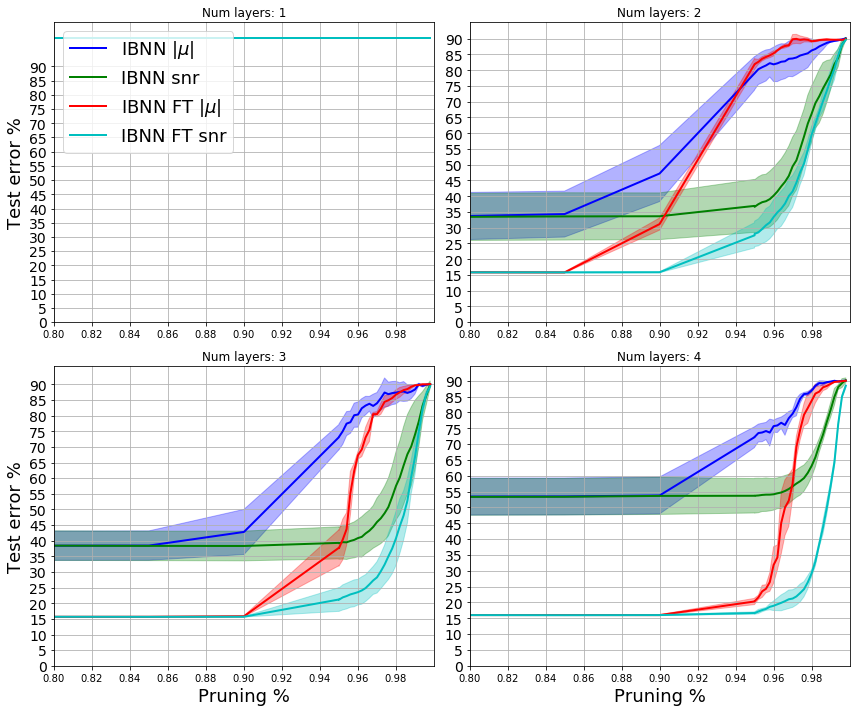

In [74]:
_ibp_ya_mean = np.mean(ya_ibp, axis=0)
_ibp_ya_std = np.std(ya_ibp, axis=0)
_ibp_yb_mean = np.mean(yb_ibp, axis=0)
_ibp_yb_std = np.std(yb_ibp, axis=0)
_ibp_ya_ft_mean = np.mean(ya_ibp_ft, axis=0)
_ibp_ya_ft_std = np.std(ya_ibp_ft, axis=0)
_ibp_yb_ft_mean = np.mean(yb_ibp_ft, axis=0)
_ibp_yb_ft_std = np.std(yb_ibp_ft, axis=0)
_ya_mean = np.mean(ya, axis=0)
_ya_std = np.std(ya, axis=0)
_yb_mean = np.mean(yb, axis=0)
_yb_std = np.std(yb, axis=0)

def test_error(ls):
    return 100*(1-np.array(ls))

def add_subplot_axes(ax,rect,axisbg='w'):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])#,axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

fig_size = (12, 10)

lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 20
legend_size = 18

fig, ax = plt.subplots(2, 2, figsize=fig_size)
num_layers=4
for i in range(num_layers):
    j = i // 2
    k = i % 2
    l1 = ax[j, k].plot(xs, test_error(_ibp_ya_mean[i]), linewidth=lw, color='b', label="IBNN $|\mu|$")
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
                   test_error([x + y for x, y in zip(_ibp_ya_mean[i], _ibp_ya_std[i])]),
                   alpha=0.3, color='b')

    l2 = ax[j, k].plot(xs, test_error(_ibp_yb_mean[i]), linewidth=lw, color='g', label='IBNN snr')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
                   test_error([x + y for x, y in zip(_ibp_yb_mean[i], _ibp_yb_std[i])]),
                   alpha=0.3, color='g')

    l3 = ax[j, k].plot(xs, test_error(_ibp_ya_ft_mean[i]), linewidth=lw, color='r', label='IBNN FT $|\mu|$')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ibp_ya_ft_mean[i], _ibp_ya_ft_std[i])]),
                   test_error([x + y for x, y in zip(_ibp_ya_ft_mean[i], _ibp_ya_ft_std[i])]),
                   alpha=0.3, color='r')

    l4 = ax[j, k].plot(xs, test_error(_ibp_yb_ft_mean[i]), linewidth=lw, color='c', label='IBNN FT snr')
    ax[j, k].fill_between(xs,
                   test_error([x - y for x, y in zip(_ibp_yb_ft_mean[i], _ibp_yb_ft_std[i])]),
                   test_error([x + y for x, y in zip(_ibp_yb_ft_mean[i], _ibp_yb_ft_std[i])]),
                   alpha=0.3, color='c')
    ax[j, k].set_title("Num layers: {}".format(i+1))
    ax[j, k].tick_params(axis='x', labelsize=10)
    ax[j, k].tick_params(axis='y', labelsize=14)
    ax[j, k].grid()
    yticks = np.arange(0, 95, 5)
    ax[j, k].set_yticks(yticks)
    xticks = np.arange(xs[0], xs[-1], 0.02)
    ax[j, k].set_xticks(xticks)
    ax[j, k].set_xlim(0.8, 1.0)
    if k == 0: # first col only
        ax[j, k].set_ylabel("Test error %", fontsize=label_size)
    if j == 1: # bottom row only
        ax[j, k].set_xlabel("Pruning %", fontsize=label_size)

subax1.tick_params(axis='x', labelsize=10)
subax1.tick_params(axis='y', labelsize=14)
subax1.grid()
yticks = np.arange(10, 95, 10)
xticks = np.arange(0.98, xs[-1], 0.004)
subax1.set_yticks(yticks)
subax1.set_xticks(xticks)
subax1.set_xlim(0.98, xs[-1])

lns = l1+l2+l3+l4
labs = [l.get_label() for l in lns]
ax[0, 0].legend(lns, labs, fontsize=legend_size, loc='upper left')
plt.tight_layout()
#plt.savefig("plots/wp_full_fmnist_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

# Sparsity

When the accuracy drops more than 10% then that pruning percentage is the sparisity measure which we use.

In [568]:
l=0
yy = _yb_mean
#yy = _ibp_yb_mean
#yy = _hibp_yb_mean
print(xs)
print(_yb_mean[l])
for i in range(len(xs)-1):
    thres = (yy[l, i] - yy[l, i+1]) / yy[l, i+1]
    print((yy[l, i] - yy[l, i+1]) / yy[l, i+1])
    if thres > 0.01:
        print("over 10% diff", i, xs[i])

[0.    0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  0.95  0.952 0.954
 0.956 0.958 0.96  0.962 0.964 0.966 0.968 0.97  0.972 0.974 0.976 0.978
 0.98  0.982 0.984 0.986 0.988 0.99  0.992 0.994 0.996 0.998]
[0.97810522 0.97795853 0.97743935 0.97629219 0.97404767 0.96949631
 0.95501978 0.86183874 0.86191258 0.84973728 0.83634856 0.81946664
 0.80708696 0.78486979 0.7710443  0.76064181 0.74812698 0.72339728
 0.69794106 0.67069555 0.63326081 0.60374703 0.57446334 0.53390229
 0.48594475 0.41910008 0.36995286 0.33446961 0.29483155 0.24540315
 0.20232133 0.15626352 0.1185087 ]
0.00014999592772036956
0.0005311696678235895
0.0011750075927955046
0.0023043311049325077
0.004694561592258651
0.01515835561993137
over 10% diff 5 0.7999999999999999
0.10811887918222152
over 10% diff 6 0.85
-8.56715103347444e-05
0.014328315425182122
over 10% diff 8 0.95
0.016008533779341323
over 10% diff 9 0.95
0.020601109051306455
over 10% diff 10 0.952
0.015338717935939628
over 10% diff 11 0.954
0.028306822468434932
o

IndexError: index 33 is out of bounds for axis 1 with size 33

In [569]:
sparsity_hibp = [0.9, 0.964, 0.980, 0.986]
sparsity_ibp = [0.9, 0.968, 0.984, 0.984]
ibp_accs = [np.mean(ya_ibp[:,i,0]) for i in range(4)] 
ibp_accs_std = [np.std(ya_ibp[:,i,0]) for i in range(4)]
hibp_accs = [np.mean(ya_hibp[:,i,0]) for i in range(4)]
hibp_accs_std = [np.std(ya_hibp[:,i,0]) for i in range(4)]
sparsity_mfvi = [0.85, 0.85, 0.8, 0.8]
mfvi_accs = [np.mean(ya[:,i,0]) for i in range(4)]
mfvi_accs_std = [np.std(ya[:,i,0]) for i in range(4)]

IndexError: index 1 is out of bounds for axis 1 with size 1

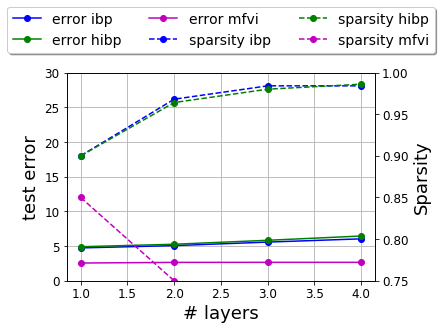

In [570]:
# Create some mock data
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 12
legend_size = 14

l = list(range(1, 5))

fig, ax1 = plt.subplots(figsize=(6, 5))
ax1.set_xlabel('# layers', fontsize=label_size)
ax1.set_ylabel('test error', fontsize=label_size)
l1 = ax1.plot(l, test_error(ibp_accs), color='b', marker='o', label='error ibp')
l2 = ax1.plot(l, test_error(hibp_accs), color='g', marker='o', label='error hibp')
l3 = ax1.plot(l, test_error(mfvi_accs), color='m', marker='o', label='error mfvi')
ax1.set_ylim(0, 30)
ax1.tick_params(axis='x', labelsize=tick_size)
ax1.tick_params(axis='y', labelsize=tick_size)
# ax1.set_xticks(range(1, 5))
# ax1.set_xticklabels(range(1, 5))
ax1.grid(True)
#ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Sparsity', fontsize=label_size)
l4 = ax2.plot(l, sparsity_ibp, color='b', marker='o', linestyle='--', label='sparsity ibp')
l5 = ax2.plot(l, sparsity_hibp, color='g', marker='o', linestyle='--', label='sparsity hibp')
l6 = ax2.plot(l, sparsity_mfvi, color='m', marker='o', linestyle='--', label='sparsity mfvi')
ax2.tick_params(axis='y', labelsize=tick_size)
ax2.set_ylim(0.75, 1.0)
#ax2.tick_params(axis='y', labelcolor=color)

lns = l1+l2+l3+l4+l5+l6
labs = [l.get_label() for l in lns]
# Put a legend to the right of the current axis
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=3, fancybox=True, shadow=True, 
           fontsize=legend_size)
#plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("plots/wp_sparsity_acc_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

# Sparsity only

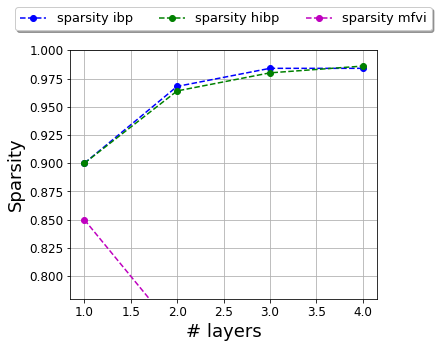

In [571]:
# Create some mock data
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 12
legend_size = 13

l = list(range(1, 5))

fig, ax = plt.subplots(figsize=(6, 5))
ax.set_xlabel('# layers', fontsize=label_size)
ax.set_ylabel('Sparsity', fontsize=label_size)
l1 = ax.plot(l, sparsity_ibp, color='b', marker='o', linestyle='--', label='sparsity ibp')
l2 = ax.plot(l, sparsity_hibp, color='g', marker='o', linestyle='--', label='sparsity hibp')
l3 = ax.plot(l, sparsity_mfvi, color='m', marker='o', linestyle='--', label='sparsity mfvi')
ax.set_ylim(0.78, 1.0)
ax.tick_params(axis='x', labelsize=tick_size)
ax.tick_params(axis='y', labelsize=tick_size)
ax.grid(True)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
# Put a legend to the right of the current axis
ax.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=3, fancybox=True, shadow=True, 
           fontsize=legend_size)
#plt.grid(True)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("plots/wp_sparsity_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

# Bar plots

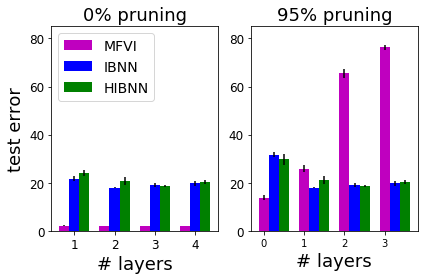

In [572]:
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 12
legend_size = 14

l = np.arange(4)
idx = np.where(xs == 0.95)[0][0]
width = 0.25
fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].set_xlabel('# layers', fontsize=label_size)
ax[0].set_ylabel('test error', fontsize=label_size)
ax[0].set_title("0% pruning", fontsize=label_size)
l3 = ax[0].bar(l, test_error(_yb_mean[:, 0]), width, color='m', label='error mfvi', yerr=_yb_std[:, 0]*100)
l1 = ax[0].bar(l + width, test_error(_ibp_yb_mean[:, 0]), width, color='b', label='error ibp', yerr=_ibp_yb_std[:, 0]*100)
l2 = ax[0].bar(l + 2*width, test_error(_hibp_yb_mean[:, 0]), width, color='g', label='error hibp', yerr=_hibp_yb_std[:,0]*100)
ax[0].set_ylim(0, 85)
ax[0].tick_params(axis='x', labelsize=tick_size)
ax[0].tick_params(axis='y', labelsize=tick_size)
ax[0].set_xticks(l + width)
ax[0].set_xticklabels(('1', '2', '3', '4'))
# ax1.set_xticks(range(1, 5))
# ax1.set_xticklabels(range(1, 5))
#ax1.tick_params(axis='y', labelcolor=color)

ax[1].set_xlabel('# layers', fontsize=label_size)
ax[1].set_title('95% pruning', fontsize=label_size)
l6 = ax[1].bar(l, test_error(_yb_mean[:, idx]), width, color='m', label='error mfvi', yerr=_yb_std[:, idx]*100)
l4 = ax[1].bar(l + width, test_error(_ibp_yb_mean[:, idx]), width, color='b', label='error ibp', yerr=_ibp_yb_std[:, idx]*100)
l5 = ax[1].bar(l + 2*width, test_error(_hibp_yb_mean[:, idx]), width, color='g', label='error hibp', yerr=_hibp_yb_std[:, idx]*100)
ax[1].tick_params(axis='y', labelsize=tick_size)
ax[1].set_ylim(0, 85)

ax[0].legend(['MFVI', 'IBNN', 'HIBNN'], fontsize=legend_size, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("plots/wp_bar_pruning_acc_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

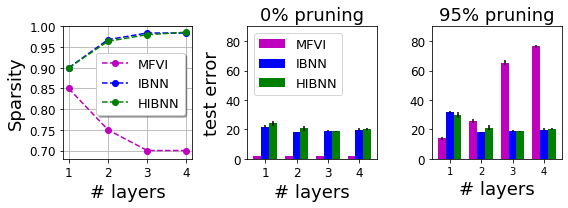

In [578]:
# Create some mock data
lw = 2
grid_color = '0.1'
grid_lw = 0.2
title_size = 16
label_size = 18
tick_size = 12
legend_size = 13

l = np.arange(4)

fig, ax = plt.subplots(1, 3, figsize=(8, 3))
ax[0].set_xlabel('# layers', fontsize=label_size)
ax[0].set_ylabel('Sparsity', fontsize=label_size)
l1 = ax[0].plot(l, sparsity_mfvi, color='m', marker='o', linestyle='--', label='MFVI')
l2 = ax[0].plot(l, sparsity_ibp, color='b', marker='o', linestyle='--', label='IBNN')
l3 = ax[0].plot(l, sparsity_hibp, color='g', marker='o', linestyle='--', label='HIBNN')
yticks = np.arange(0.7, 1.0, 0.05)
ax[0].set_yticks(yticks)
ax[0].set_ylim(0.68, 1.0)
ax[0].tick_params(axis='x', labelsize=tick_size)
ax[0].tick_params(axis='y', labelsize=tick_size)
ax[0].set_xticks(l)
ax[0].set_xticklabels(('1', '2', '3', '4'))
ax[0].grid(True)

lns = l1+l2+l3
labs = [l.get_label() for l in lns]
# Put a legend to the right of the current axis
ax[0].legend(lns, labs, loc='upper center', bbox_to_anchor=(0.6, 0.85), ncol=1, fancybox=True, shadow=True, 
           fontsize=legend_size)

idx = np.where(xs == 0.95)[0][0]
width = 0.25
ax[1].set_xlabel('# layers', fontsize=label_size)
ax[1].set_ylabel('test error', fontsize=label_size)
ax[1].set_title("0% pruning", fontsize=label_size)
ax[1].bar(l, test_error(_yb_mean[:, 0]), width, color='m', label='error mfvi', yerr=_yb_std[:, 0]*100)
ax[1].bar(l + width, test_error(_ibp_yb_mean[:, 0]), width, color='b', label='error ibp', yerr=_ibp_yb_std[:, 0]*100)
ax[1].bar(l + 2*width, test_error(_hibp_yb_mean[:, 0]), width, color='g', label='error hibp', yerr=_hibp_yb_std[:,0]*100)
ax[1].set_ylim(0, 90)
ax[1].tick_params(axis='x', labelsize=tick_size)
ax[1].tick_params(axis='y', labelsize=tick_size)
ax[1].set_xticks(l + width)
ax[1].set_xticklabels(('1', '2', '3', '4'))
# ax1.set_xticks(range(1, 5))
# ax1.set_xticklabels(range(1, 5))
#ax1.tick_params(axis='y', labelcolor=color)

ax[2].set_xlabel('# layers', fontsize=label_size)
ax[2].set_title('95% pruning', fontsize=label_size)
ax[2].bar(l, test_error(_yb_mean[:, idx]), width, color='m', label='error mfvi', yerr=_yb_std[:, idx]*100)
ax[2].bar(l + width, test_error(_ibp_yb_mean[:, idx]), width, color='b', label='error ibp', yerr=_ibp_yb_std[:, idx]*100)
ax[2].bar(l + 2*width, test_error(_hibp_yb_mean[:, idx]), width, color='g', label='error hibp', yerr=_hibp_yb_std[:, idx]*100)
ax[2].tick_params(axis='y', labelsize=tick_size)
ax[2].set_ylim(0, 90)
ax[2].set_xticks(l + width)
ax[2].set_xticklabels(('1', '2', '3', '4'))

ax[1].legend(['MFVI', 'IBNN', 'HIBNN'], fontsize=legend_size, loc='upper left')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("plots/wp_fmnist_pruning_sparsity_acc_hibp_ibp.pdf", bbox_inches='tight')
plt.show()

In [576]:
yticks

array([0.7, 0.8, 0.9, 1. ])

# Z matrix

In [ ]:
# graph_hibp_wp_hibp_wp_lr_run0
hidden_size = [200, 200]
batch_size = 512
no_epochs = 200

tf.set_random_seed(12)
np.random.seed(1)

ibp_acc = np.array([])
Zs = []
coreset_size = 0
data_gen = MnistGenerator()
single_head=False
in_dim, out_dim = data_gen.get_dims()
x_testsets, y_testsets = [], []
task_id=0
runs=5
tag = 'hibp'
for run in range(runs):
    name='ibp_wp_{0}_run{1}'.format(tag, run)

    tf.reset_default_graph()  
    x_train, y_train, x_test, y_test = data_gen.task()

    # Set the readout head to train
    head = 0 if single_head else task_id
    bsize = x_train.shape[0] if (batch_size is None) else batch_size

    # Train network with maximum likelihood to initialize first model
    if task_id == 0:
        ml_model = Vanilla_NN(in_dim, hidden_size, out_dim, x_train.shape[0])
        ml_model.train(x_train, y_train, task_id, 10, bsize)
        mf_weights = ml_model.get_weights()
        mf_variances = None
        mf_betas = None
        ml_model.close_session()

    # Train on non-coreset data
    model = HIBP_BNN(alphas=[1.]*len(hidden_size), 
                           input_size=in_dim, 
                           hidden_size=hidden_size, 
                           output_size=out_dim, 
                           training_size=x_train.shape[0], 
                           no_pred_samples=100,
                           num_ibp_samples=10, prev_means=mf_weights, 
                           prev_log_variances=mf_variances, 
                           prev_betas=mf_betas,
                           learning_rate=0.001, learning_rate_decay=0.87,
                           prior_mean=0.0, prior_var=0.1,
                           alpha0=5.0, beta0=1.0,
                           lambda_1=1.0, lambda_2=1.0,
                           tensorboard_dir='logs_wp',
                           name='hibp_wp_hibp_wp_lr_run{0}'.format(run),
                           use_local_reparam=True, implicit_beta=True)

    model.create_model()
    model.restore(os.path.join("logs_wp", 'graph_{0}'.format('hibp_wp_hibp_wp_lr_run{0}').format(run)))
#     xs, ya, yb = model.prune_weights(x_test, y_test, head)
#     ya_all[run, :] = ya
#     yb_all[run, :] = yb

    Zs.append(model.sess.run(model.Z, feed_dict={model.x: x_test, model.task_idx: task_id, model.training: False}))

    model.close_session()

In [7]:
len(Zs)

5

In [15]:
Zs[0][0].shape

(1, 10000, 200)

In [16]:
num_layers=2
num_tasks=1
num_runs=5
_Z_hibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Zs[i][j]))
    _Z_hibp.append(tmp)

In [17]:
__Z_hibp = [np.concatenate(_Z_hibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_hibp[0].shape

(50000, 200)

In [18]:
len(_Z_hibp)

2

In [21]:
hidden_size = [200, 200]
batch_size = 128
no_epochs = 100
Zs_ibp = []
tf.set_random_seed(12)
np.random.seed(1)

for run in range(runs):
    data_gen = MnistGenerator()
    single_head=True
    in_dim, out_dim = data_gen.get_dims()
    task_id=0

    tf.reset_default_graph()
    x_train, y_train, x_test, y_test = data_gen.task()

    tag = 'ibp_l2_wp_n'
    name='ibp_wp_{0}_run{1}'.format(tag, run)

    # Set the readout head to train
    head = 0 if single_head else task_id
    bsize = x_train.shape[0] if (batch_size is None) else batch_size

    # Train network with maximum likelihood to initialize first model
    if task_id == 0:
        ml_model = Vanilla_NN(in_dim, hidden_size, out_dim, x_train.shape[0])
        ml_model.train(x_train, y_train, task_id, 10, bsize)
        mf_weights = ml_model.get_weights()
        mf_variances = None
        mf_betas = None
        ml_model.close_session()

    # Train on non-coreset data
    model = IBP_BNN(input_size=in_dim, 
                               hidden_size=hidden_size, 
                               output_size=out_dim, 
                               training_size=x_train.shape[0], 
                               no_pred_samples=100,
                               num_ibp_samples=10, prev_means=mf_weights, 
                               prev_log_variances=mf_variances, 
                               prev_betas=mf_betas,
                               learning_rate=0.001, learning_rate_decay=0.87,
                               prior_mean=0.0, prior_var=0.1,
                               alpha0=5.0, beta0=1.0,
                               lambda_1=1.0, lambda_2=1.0,
                               tensorboard_dir='logs_wp',
                               name=name,
                               use_local_reparam=True, implicit_beta=True)

    model.create_model()
    model.restore(model.log_folder)

    Zs_ibp.append(model.sess.run(model.Z, feed_dict={model.x: x_test, model.task_idx: task_id,
                                                     model.training: False}))

    model.close_session()

Epoch: 0001 cost= 0.280326372
Epoch: 0006 cost= 0.028386525
Z: (1, ?, 200)
Z: (1, ?, 200)
INFO:tensorflow:Restoring parameters from logs_wp/graph_ibp_wp_ibp_l2_wp_n_run0/model.ckpt
Epoch: 0001 cost= 0.279246731
Epoch: 0006 cost= 0.027772299
Z: (1, ?, 200)
Z: (1, ?, 200)
INFO:tensorflow:Restoring parameters from logs_wp/graph_ibp_wp_ibp_l2_wp_n_run1/model.ckpt
Epoch: 0001 cost= 0.281405082
Epoch: 0006 cost= 0.026062425
Z: (1, ?, 200)
Z: (1, ?, 200)
INFO:tensorflow:Restoring parameters from logs_wp/graph_ibp_wp_ibp_l2_wp_n_run2/model.ckpt
Epoch: 0001 cost= 0.279183709
Epoch: 0006 cost= 0.027951502
Z: (1, ?, 200)
Z: (1, ?, 200)
INFO:tensorflow:Restoring parameters from logs_wp/graph_ibp_wp_ibp_l2_wp_n_run3/model.ckpt
Epoch: 0001 cost= 0.290161883
Epoch: 0006 cost= 0.029862621
Z: (1, ?, 200)
Z: (1, ?, 200)
INFO:tensorflow:Restoring parameters from logs_wp/graph_ibp_wp_ibp_l2_wp_n_run4/model.ckpt


In [22]:
len(Zs_ibp)

5

In [23]:
Zs_ibp[0][0].shape

(1, 10000, 200)

In [24]:
num_layers=2
num_tasks=1
num_runs=5
_Z_ibp = []
for j in range(num_tasks*num_layers):
    tmp = []
    for i in range(num_runs):
        tmp.append(np.squeeze(Zs_ibp[i][j]))
    _Z_ibp.append(tmp)

In [25]:
__Z_ibp = [np.concatenate(_Z_ibp[i], axis=0) for i in range(num_tasks*num_layers)]
__Z_ibp[0].shape

(50000, 200)

In [26]:
len(__Z_ibp)

2

In [27]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
ticks = ['H-IBP', 'IBP']
fig_size=(4, 3)

def set_box_pairs(bp):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    
    
    plt.setp(bp['caps'][0], color='#D7191C', lw=2)
    plt.setp(bp['caps'][1], color='#D7191C', lw=2)
    plt.setp(bp['caps'][2], color='#2C7BB6', lw=2)
    plt.setp(bp['caps'][3], color='#2C7BB6', lw=2)
    plt.setp(bp['medians'][0], color='#D7191C', lw=2)
    plt.setp(bp['medians'][1], color='#2C7BB6', lw=2)

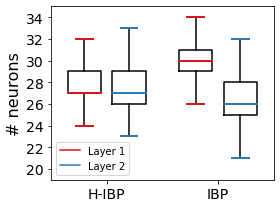

In [53]:
num_layers = 2
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_hibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_layers)],
                  positions=[-0.4, 0.4], sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(__Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_layers)],
                  positions=[2. - 0.4, 2. + 0.4], sym='', widths=0.6)
set_box_pairs(bpl) # colors are from http://colorbrewer2.org/
set_box_pairs(bpr)

# draw temporary red and blue lines and use them to create a legend
hb, = plt.plot([], '#D7191C')
hr, = plt.plot([], '#2C7BB6')
plt.legend((hb, hr), ('Layer 1', 'Layer 2'), loc='lower left')
hb.set_visible(False)
hr.set_visible(False)

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2 - 1)
plt.ylim(19, 35)
plt.ylabel('# neurons', fontsize=legend_size)
#plt.xlabel('Layer', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_mnist_ibp_vs_hibp.pdf', bbox_inches='tight')
plt.show()

In [ ]:
np.squeeze(Z[0]).shape

In [ ]:
set_y_axis = False

lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 22
label_size = 22
tick_size = 20
legend_size = 22
fig_size=(6, 5)

fig, ax = plt.subplots(1, 1, figsize=fig_size)

imgplot = ax.imshow(Z[0][0, :50,:60], cmap=plt.cm.Greys, vmin=0, vmax=1)
x_ticks = np.arange(0.0, 100, step=50)
plt.xticks(x_ticks, fontsize=tick_size)
plt.xlabel('$k$', fontsize=legend_size)
plt.yticks([], [])
#cbar_ax = fig.add_axes([0.95, 0.21, 0.05, 0.59])
#fig.colorbar(imgplot, cax=cbar_ax)
#cbar_ax.tick_params(labelsize=legend_size) 
plt.savefig('plots/hibp_weight_pruning_Z1.pdf', bbox_inches='tight')
fig.show()

In [ ]:
set_y_axis = False

lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 22
label_size = 22
tick_size = 20
legend_size = 22

fig, ax = plt.subplots(1, 1, figsize=fig_size)

imgplot = ax.imshow(Z[1][0, :50,:60], cmap=plt.cm.Greys, vmin=0, vmax=1)
x_ticks = np.arange(0.0, 100, step=50)
plt.xticks(x_ticks, fontsize=tick_size)
plt.xlabel('$k$', fontsize=legend_size)
plt.yticks([], [])
cbar_ax = fig.add_axes([0.95, 0.13, 0.05, 0.75])
fig.colorbar(imgplot, cax=cbar_ax)
cbar_ax.tick_params(labelsize=legend_size) 
plt.savefig('plots/hibp_weight_pruning_Z2.pdf', bbox_inches='tight')
fig.show()

In [ ]:
set_y_axis = False

lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 22
label_size = 22
tick_size = 20
legend_size = 22

# fig, ax = plt.subplots(1, 1)

# imgplot = ax.imshow(np.squeeze(Z[0])[:50,:100], cmap=plt.cm.Greys, vmin=0, vmax=1)
# x_ticks = np.arange(0.0, 100, step=50)
# plt.xticks(x_ticks, fontsize=tick_size)
# plt.xlabel('$k$', fontsize=legend_size)
# plt.yticks([], [])
# cbar_ax = fig.add_axes([0.95, 0.21, 0.05, 0.59])
# fig.colorbar(imgplot, cax=cbar_ax)
# cbar_ax.tick_params(labelsize=legend_size) 
# plt.savefig('plots/weight_pruning_Z.pdf', bbox_inches='tight')
# fig.show()

fig, ax = plt.subplots(2, 1, figsize=(4, 4))
for i in range(2):
    imgplot = ax[i].imshow(Z[i][0, :20, :60], cmap=plt.cm.Greys, vmin=0, vmax=1)
    ax[0].set_xticks(np.arange(0.0, 100, step=50))
    ax[0].set_xticklabels([], fontsize=tick_size)
    ax[i].set_yticks([], [])
    ax[i].set_yticklabels([], fontsize=tick_size)
    if i == 1:
        ax[i].set_xlabel('$k$', fontsize=legend_size)
        ax[i].set_xticklabels(np.arange(0, 100, step=50), fontsize=tick_size)
        ax[i].set_xticks(np.arange(0.0, 100, step=50))
        #ax[i].set_yticklabels([])
        cbar_ax = fig.add_axes([1.0, 0.22, 0.05, 0.69])
        fig.colorbar(imgplot, cax=cbar_ax, ticks = [0.0, 0.5, 1.0])
        cbar_ax.tick_params(labelsize=legend_size) 
        # Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.tight_layout()
plt.savefig('plots/hibp_weight_pruning_Zs.pdf', bbox_inches='tight')
fig.show()

# IBP 

In [55]:
# weight_pruning_runs5_ibp_l2_wp_n.pkl
with open('results/weight_pruning_ibp_new_xs.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_ibp', 'yb_ibp'])

In [56]:
xs_ibp = d['xs']
ya_ibp = d['ya_ibp']
yb_ibp = d['yb_ibp']

In [57]:
np.std(ya_ibp[:,0])

0.0011919769128238837

In [58]:
# weight_pruning_runs5_ibp_l2_wp_n.pkl
with open('results/weight_pruning_hibp_new_xs.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_ibp', 'yb_ibp'])

In [59]:
xs_hibp = d['xs']
ya_hibp = d['ya_ibp']
yb_hibp = d['yb_ibp']

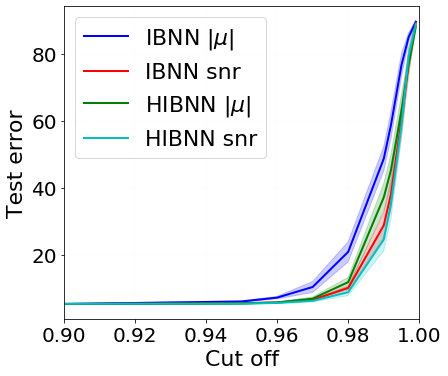

In [62]:
_ibp_ya_mean = np.mean(ya_ibp, axis=0)
_ibp_ya_std = np.std(ya_ibp, axis=0)
_ibp_yb_mean = np.mean(yb_ibp, axis=0)
_ibp_yb_std = np.std(yb_ibp, axis=0)
_hibp_ya_mean = np.mean(ya_hibp, axis=0)
_hibp_ya_std = np.std(ya_hibp, axis=0)
_hibp_yb_mean = np.mean(yb_hibp, axis=0)
_hibp_yb_std = np.std(yb_hibp, axis=0)

def test_error(ls):
    return 100*(1-np.array(ls))

fig_size = (6, 5)

set_y_axis = False

lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 22
tick_size = 20
legend_size = 22

fig, ax = plt.subplots(1, 1, figsize=fig_size)

ax.plot(xs_ibp, test_error(_ibp_ya_mean), linewidth=lw, color='b')
ax.fill_between(xs_ibp,
               test_error([x - y for x, y in zip(_ibp_ya_mean, _ibp_ya_std)]),
               test_error([x + y for x, y in zip(_ibp_ya_mean, _ibp_ya_std)]),
               alpha=0.2, color='b')

ax.plot(xs_ibp, test_error(_ibp_yb_mean), linewidth=lw, color='r')
ax.fill_between(xs_ibp,
               test_error([x - y for x, y in zip(_ibp_yb_mean, _ibp_yb_std)]),
               test_error([x + y for x, y in zip(_ibp_yb_mean, _ibp_yb_std)]),
               alpha=0.2, color='r')

ax.plot(xs_hibp, test_error(_hibp_ya_mean), linewidth=lw, color='g')
ax.fill_between(xs_hibp,
               test_error([x - y for x, y in zip(_hibp_ya_mean, _hibp_ya_std)]),
               test_error([x + y for x, y in zip(_hibp_ya_mean, _hibp_ya_std)]),
               alpha=0.2, color='g')

ax.plot(xs_hibp, test_error(_hibp_yb_mean), linewidth=lw, color='c')
ax.fill_between(xs_hibp,
               test_error([x - y for x, y in zip(_hibp_yb_mean, _hibp_yb_std)]),
               test_error([x + y for x, y in zip(_hibp_yb_mean, _hibp_yb_std)]),
               alpha=0.2, color='c')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.yticks(fontsize=tick_size)
x_ticks = np.arange(0.0, 1.5, step=0.02)
plt.xticks(x_ticks, fontsize=tick_size)
plt.ticklabel_format(axis='y', style='sci')
ax = fig.gca()
#ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1))
#ax.set_yticklabels([])
#plt.yscale('log')
#plt.legend(["IBP $|\mu|$", 'IBP snr'], fontsize=legend_size, loc='top left')
plt.legend(["IBNN $|\mu|$", 'IBNN snr',
           "HIBNN $|\mu|$", 'HIBNN snr',], fontsize=legend_size, loc='upper left')
plt.tight_layout()
plt.xlabel("Cut off", fontsize=legend_size)
plt.ylabel("Test error", fontsize=legend_size)
plt.xlim(0.9, 1.0)
plt.savefig("plots/weight_pruning_mnist_ibp_vs_hibp.pdf", bbox_inches='tight')
plt.show()

In [ ]:
hidden_size = [200, 200]
batch_size = 512
no_epochs = 100

tf.set_random_seed(12)
np.random.seed(1)

ibp_acc = np.array([])

coreset_size = 0
data_gen = MnistGenerator()
single_head=False
in_dim, out_dim = data_gen.get_dims()
x_testsets, y_testsets = [], []
task_id=0
    
tf.reset_default_graph()  
x_train, y_train, x_test, y_test = data_gen.task()
x_testsets.append(x_test)
y_testsets.append(y_test)

tag = 'ibp_l2_wp_n'
run = 0
name='ibp_wp_{0}_run{1}'.format(tag, run)

# Set the readout head to train
head = 0 if single_head else task_id
bsize = x_train.shape[0] if (batch_size is None) else batch_size

# Train network with maximum likelihood to initialize first model
if task_id == 0:
    ml_model = Vanilla_NN(in_dim, hidden_size, out_dim, x_train.shape[0])
    ml_model.train(x_train, y_train, task_id, 100, bsize)
    mf_weights = ml_model.get_weights()
    mf_variances = None
    mf_betas = None
    ml_model.close_session()

# Train on non-coreset data
model = IBP_BNN(input_size=in_dim, 
                           hidden_size=hidden_size, 
                           output_size=out_dim, 
                           training_size=x_train.shape[0], 
                           no_pred_samples=100,
                           num_ibp_samples=10, prev_means=mf_weights, 
                           prev_log_variances=mf_variances, 
                           prev_betas=mf_betas,
                           learning_rate=0.001, learning_rate_decay=0.87,
                           prior_mean=0.0, prior_var=0.1,
                           alpha0=5.0, beta0=1.0,
                           lambda_1=1.0, lambda_2=1.0,
                           tensorboard_dir='logs_wp',
                           name=name,
                           use_local_reparam=True, implicit_beta=True)

model.create_model()
model.restore(model.log_folder)

Z_ibp = model.sess.run(model.Z, feed_dict={model.x: x_test, model.task_idx: task_id, model.training: False})

model.close_session()

In [ ]:
np.mean(np.squeeze(Z_ibp[0]), 1).shape

In [ ]:
##### Box plot params

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 16
tick_size = 14
legend_size = 16

num_layers = 2
ticks = ['H-IBP', 'IBP']
fig_size=(4, 3)

def set_box_pairs(bp):
    plt.setp(bp['boxes'], color='black', lw=1.5)
    plt.setp(bp['whiskers'], color='black', lw=1.5)
    
    
    plt.setp(bp['caps'][0], color='#D7191C', lw=2)
    plt.setp(bp['caps'][1], color='#D7191C', lw=2)
    plt.setp(bp['caps'][2], color='#2C7BB6', lw=2)
    plt.setp(bp['caps'][3], color='#2C7BB6', lw=2)
    plt.setp(bp['medians'][0], color='#D7191C', lw=2)
    plt.setp(bp['medians'][1], color='#2C7BB6', lw=2)

In [ ]:
num_layers = 2
plt.figure(figsize=fig_size)
bpl = plt.boxplot([np.sum(np.asarray(np.squeeze(Z[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_layers)],
                  positions=[-0.4, 0.4], sym='', widths=0.6)
bpr = plt.boxplot([np.sum(np.asarray(np.squeeze(Z_ibp[i] > 0.1)).astype(int), axis=1).reshape(-1) for i in range(num_layers)],
                  positions=[2. - 0.4, 2. + 0.4], sym='', widths=0.6)
set_box_pairs(bpl) # colors are from http://colorbrewer2.org/
set_box_pairs(bpr)

# draw temporary red and blue lines and use them to create a legend
hb, = plt.plot([], '#D7191C')
hr, = plt.plot([], '#2C7BB6')
plt.legend((hb, hr), ('Layer 1', 'Layer 2'))
hb.set_visible(False)
hr.set_visible(False)

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.xticks(range(0, len(ticks) * 2, 2), ticks, fontsize=tick_size)
plt.yticks(fontsize=tick_size)
plt.xlim(-1, len(ticks)*2 - 1)
#plt.xlabel('Layer', fontsize=label_size)
plt.tight_layout()
plt.savefig('plots/Zs_mnist_ibp_vs_hibp.pdf', bbox_inches='tight')
plt.show()

# Sparse Variational Dropout

In [63]:
# import pick file
with open('sparse_vd/weight_pruning_svd.pkl', 'rb') as input_file:
    d_svd = pickle.load(input_file)
d_svd.keys()

dict_keys(['xs', 'ya', 'yb'])

In [64]:
np.mean(d_svd['yb'][:,0])

0.9836

In [65]:
with open('results/weight_pruning_hibp_new_xs.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_ibp', 'yb_ibp'])

In [66]:
np.std(d['yb_ibp'][:,0])

0.0017043951950039208

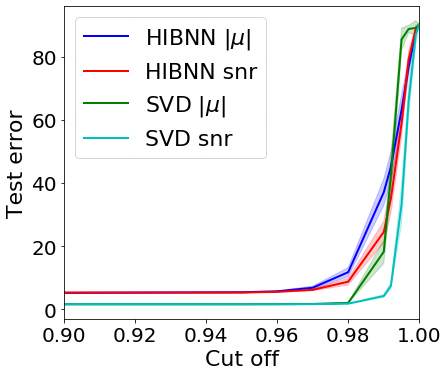

In [67]:
svd_xs = d_svd['xs']
svd_ya_mean = np.mean(d_svd['ya'], axis=0)
svd_ya_std = np.std(d_svd['ya'], axis=0)
svd_yb_mean = np.mean(d_svd['yb'], axis=0)
svd_yb_std = np.std(d_svd['yb'], axis=0)
hibp_xs = d['xs']
hibp_ya_mean = np.mean(d['ya_ibp'], axis=0)
hibp_ya_std = np.std(d['ya_ibp'], axis=0)
hibp_yb_mean = np.mean(d['yb_ibp'], axis=0)
hibp_yb_std = np.std(d['yb_ibp'], axis=0)

def test_error(ls):
    return 100*(1-np.array(ls))

fig_size = (6, 5)

set_y_axis = False

lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 22
tick_size = 20
legend_size = 22

fig, ax = plt.subplots(1, 1, figsize=fig_size)

ax.plot(hibp_xs, test_error(hibp_ya_mean), linewidth=lw, color='b')
ax.fill_between(hibp_xs,
               test_error([x - y for x, y in zip(hibp_ya_mean, hibp_ya_std)]),
               test_error([x + y for x, y in zip(hibp_ya_mean, hibp_ya_std)]),
               alpha=0.2, color='b')

ax.plot(hibp_xs, test_error(hibp_yb_mean), linewidth=lw, color='r')
ax.fill_between(hibp_xs,
               test_error([x - y for x, y in zip(hibp_yb_mean, hibp_yb_std)]),
               test_error([x + y for x, y in zip(hibp_yb_mean, hibp_yb_std)]),
               alpha=0.2, color='r')

ax.plot(svd_xs, test_error(svd_ya_mean), linewidth=lw, color='g')
ax.fill_between(svd_xs,
               test_error([x - y for x, y in zip(svd_ya_mean, svd_ya_std)]),
               test_error([x + y for x, y in zip(svd_ya_mean, svd_ya_std)]),
               alpha=0.2, color='g')

ax.plot(svd_xs, test_error(svd_yb_mean), linewidth=lw, color='c')
ax.fill_between(svd_xs,
               test_error([x - y for x, y in zip(svd_yb_mean, svd_yb_std)]),
               test_error([x + y for x, y in zip(svd_yb_mean, svd_yb_std)]),
               alpha=0.2, color='c')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.yticks(fontsize=tick_size)
x_ticks = np.arange(0.0, 1.5, step=0.02)
plt.xticks(x_ticks, fontsize=tick_size)
plt.ticklabel_format(axis='y', style='sci')
ax = fig.gca()
#ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1))
#ax.set_yticklabels([])
#plt.yscale('log')
#plt.legend(["IBP $|\mu|$", 'IBP snr'], fontsize=legend_size, loc='top left')
plt.legend(["HIBNN $|\mu|$", 'HIBNN snr',
           "SVD $|\mu|$", 'SVD snr',], fontsize=legend_size, loc='upper left')
plt.tight_layout()
plt.xlabel("Cut off", fontsize=legend_size)
plt.ylabel("Test error", fontsize=legend_size)
plt.xlim(0.9, 1.0)
plt.savefig("plots/weight_pruning_mnist_hibp_vs_svd.pdf", bbox_inches='tight')
plt.show()

# Local reparam + improved MFVI

In [39]:
# weight_pruning_runs5_ibp_l2_wp_n.pkl
with open('results/weight_pruning_runs5_ibp_wp_lr_n.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_nnvi', 'yb_nnvi', 'ya_ibp', 'yb_ibp'])

In [40]:
xs_ibp = d['xs']
ya = d['ya_nnvi']
yb = d['yb_nnvi']
ya_ibp = d['ya_ibp']
yb_ibp = d['yb_ibp']

In [41]:
xs_ibp.shape

(19,)

In [42]:
np.mean(ya[:,0]) # no pruning mfvi acc

0.9769994074785255

In [43]:
# weight_pruning_runs5_ibp_l2_wp_n.pkl
with open('results/weight_pruning_hibp_new_xs.pkl', 'rb') as input_file:
    d = pickle.load(input_file)
d.keys()

dict_keys(['xs', 'ya_ibp', 'yb_ibp'])

In [44]:
xs_hibp = d['xs']
ya_hibp = d['ya_ibp']
yb_hibp = d['yb_ibp']

In [45]:
xs_hibp.shape

(19,)

In [46]:
ya_hibp.shape

(5, 19)

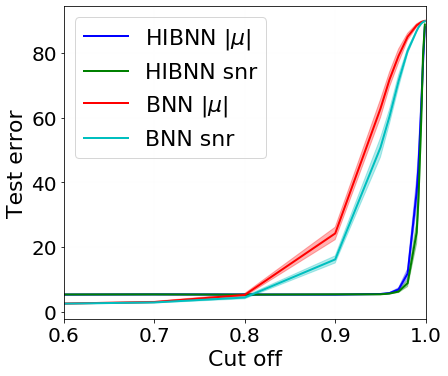

In [49]:
_hibp_ya_mean = np.mean(ya_hibp, axis=0)
_hibp_ya_std = np.std(ya_hibp, axis=0)
_hibp_yb_mean = np.mean(yb_hibp, axis=0)
_hibp_yb_std = np.std(yb_hibp, axis=0)
_ya_mean = np.mean(ya, axis=0)
_ya_std = np.std(ya, axis=0)
_yb_mean = np.mean(yb, axis=0)
_yb_std = np.std(yb, axis=0)

def test_error(ls):
    return 100*(1-np.array(ls))

fig_size = (6, 5)

set_y_axis = False

lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 22
tick_size = 20
legend_size = 22

fig, ax = plt.subplots(1, 1, figsize=fig_size)

ax.plot(xs_ibp, test_error(_hibp_ya_mean), linewidth=lw, color='b')
ax.fill_between(xs_ibp,
               test_error([x - y for x, y in zip(_hibp_ya_mean, _hibp_ya_std)]),
               test_error([x + y for x, y in zip(_hibp_ya_mean, _hibp_ya_std)]),
               alpha=0.3, color='b')

ax.plot(xs_ibp, test_error(_hibp_yb_mean), linewidth=lw, color='g')
ax.fill_between(xs_ibp,
               test_error([x - y for x, y in zip(_hibp_yb_mean, _hibp_yb_std)]),
               test_error([x + y for x, y in zip(_hibp_yb_mean, _hibp_yb_std)]),
               alpha=0.3, color='g')

ax.plot(xs_ibp, test_error(_ya_mean), linewidth=lw, color='r')
ax.fill_between(xs_ibp,
               test_error([x - y for x, y in zip(_ya_mean, _ya_std)]),
               test_error([x + y for x, y in zip(_ya_mean, _ya_std)]),
               alpha=0.3, color='r')

ax.plot(xs_ibp, test_error(_yb_mean), linewidth=lw, color='c')
ax.fill_between(xs_ibp,
               test_error([x - y for x, y in zip(_yb_mean, _yb_std)]),
               test_error([x + y for x, y in zip(_yb_mean, _yb_std)]),
               alpha=0.3, color='c')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
ax.set_xlim(0.0, 0.5)
plt.yticks(fontsize=tick_size)
x_ticks = np.arange(0.0, 1.5, step=0.1)
plt.xticks(x_ticks, fontsize=tick_size)
plt.ticklabel_format(axis='y')
ax = fig.gca()
#ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1))
#ax.set_yticklabels([])
#plt.yscale('log')
plt.legend(["HIBNN $|\mu|$", 'HIBNN snr', 'BNN $|\mu|$', 'BNN snr'], fontsize=legend_size, loc='upper left')
plt.tight_layout()
plt.xlabel("Cut off", fontsize=legend_size)
plt.ylabel("Test error", fontsize=legend_size)
plt.xlim(0.6, 1.0)
ax.ticklabel_format(useOffset=False)
plt.savefig("plots/weight_pruning_new_hibp_x5_better_mfvi.pdf", bbox_inches='tight')
plt.show()

In [ ]:
_ibp_ya_mean = np.mean(ya_ibp, axis=0)
_ibp_ya_std = np.std(ya_ibp, axis=0)
_ibp_yb_mean = np.mean(yb_ibp, axis=0)
_ibp_yb_std = np.std(yb_ibp, axis=0)
_hibp_ya_mean = np.mean(ya_hibp, axis=0)
_hibp_ya_std = np.std(ya_hibp, axis=0)
_hibp_yb_mean = np.mean(yb_hibp, axis=0)
_hibp_yb_std = np.std(yb_hibp, axis=0)

def test_error(ls):
    return 100*(1-np.array(ls))

fig_size = (6, 5)

set_y_axis = False

lw = 2

grid_color = '0.1'
grid_lw = 0.2

title_size = 16
label_size = 22
tick_size = 20
legend_size = 22

fig, ax = plt.subplots(1, 1, figsize=fig_size)

ax.plot(xs_ibp, test_error(_ibp_ya_mean), linewidth=lw, color='b')
ax.fill_between(xs_ibp,
               test_error([x - y for x, y in zip(_ibp_ya_mean, _ibp_ya_std)]),
               test_error([x + y for x, y in zip(_ibp_ya_mean, _ibp_ya_std)]),
               alpha=0.2, color='b')

ax.plot(xs_ibp, test_error(_ibp_yb_mean), linewidth=lw, color='r')
ax.fill_between(xs_ibp,
               test_error([x - y for x, y in zip(_ibp_yb_mean, _ibp_yb_std)]),
               test_error([x + y for x, y in zip(_ibp_yb_mean, _ibp_yb_std)]),
               alpha=0.2, color='r')

ax.plot(xs_ibp, test_error(_hibp_ya_mean), linewidth=lw, color='g')
ax.fill_between(xs_ibp,
               test_error([x - y for x, y in zip(_hibp_ya_mean, _hibp_ya_std)]),
               test_error([x + y for x, y in zip(_hibp_ya_mean, _hibp_ya_std)]),
               alpha=0.2, color='g')

ax.plot(xs_ibp, test_error(_hibp_yb_mean), linewidth=lw, color='c')
ax.fill_between(xs_ibp,
               test_error([x - y for x, y in zip(_hibp_yb_mean, _hibp_yb_std)]),
               test_error([x + y for x, y in zip(_hibp_yb_mean, _hibp_yb_std)]),
               alpha=0.2, color='c')

plt.grid(True, which="both", color=grid_color, linewidth=0.1, alpha=0.1)
plt.yticks(fontsize=tick_size)
x_ticks = np.arange(0.0, 1.5, step=0.02)
plt.xticks(x_ticks, fontsize=tick_size)
plt.ticklabel_format(axis='y', style='sci')
ax = fig.gca()
ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1))
#ax.set_yticklabels([])
#plt.yscale('log')
#plt.legend(["IBP $|\mu|$", 'IBP snr'], fontsize=legend_size, loc='top left')
plt.legend(["IBP $|\mu|$", 'IBP snr',
           "H-IBP $|\mu|$", 'H-IBP snr',], fontsize=legend_size, loc='upper left')
plt.tight_layout()
plt.xlabel("Cut off", fontsize=legend_size)
plt.ylabel("Test error", fontsize=legend_size)
plt.xlim(0.9, 1.0)
#plt.savefig("plots/weight_pruning_mnist_ibp_vs_hibp.pdf", bbox_inches='tight')
plt.show()